In [3]:
%load_ext autoreload
%autoreload 2

from glycontact.process import *
from glycontact.visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

# Case studies and applications of GlyContact

## 1 - Glycans with one major structural cluster
Each glycan structure is described on GlycoShape by multiple PDB files, corresponding to multiple structural clusters. Structures were obtained using Molecular Dynamic simulations (MD) and classified based on similarity within these conformational clusters.

Using GlyContact, we can search for major glycan structures, meaning glycans with one favored conformation.

In [4]:
### The following function returns glycans with one preferred conformation according to a frequency threshold
### Here, having a preferred conformation means having a cluster observed with a frequency >= 70%
res = glycan_cluster_pattern(threshold = 70)

### Glycans with a major cluster are saved in the first list returned by glycan_cluster_pattern
print(res[0])

Number of glycans with one major cluster: 35
Number of glycans without a major cluster: 602
['Man3Me(a1-3)[Man3Me(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'IdoA2S(a1-4)GlcNS6S', 'Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Glc', 'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)][Fuc(a1-6)]GlcNAc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc', 'Gal(b1-4)Glc', 'GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'Fuc', 'Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1

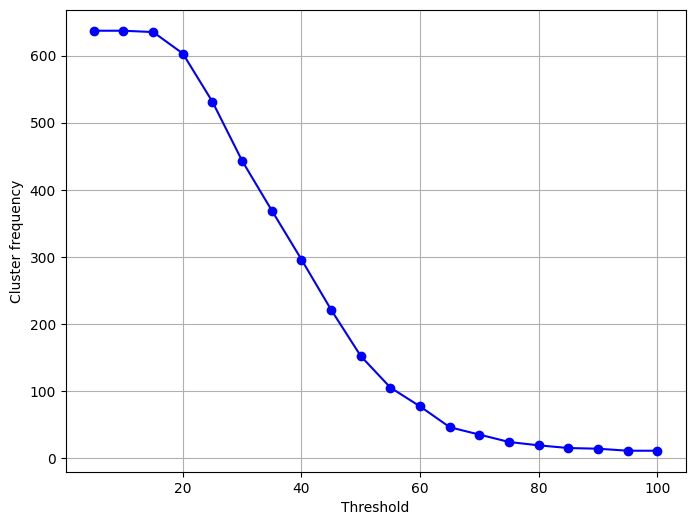

In [5]:
### Let see distribution of cluster frequencies for different thresholds

x = []
freq = []
for threshold in range(100,0,-5):
    x.append(threshold)
    freq.append(len(glycan_cluster_pattern(threshold, True)[0]))

plt.figure(figsize=(8, 6))
plt.plot(x, freq, marker='o', linestyle='-', color='b')  # Line plot with markers
plt.xlabel('Threshold')
plt.ylabel('Cluster frequency')
plt.grid(True)
plt.show()


In [6]:
### Lets investigate which glycans have a major cluster with different thresholds
for threshold in range(100,60,-10):
    print("\nThreshold: " + str(threshold))
    for g in glycan_cluster_pattern(threshold, True)[0] :
        print(g)


Threshold: 100
Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc
Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Fuc
Man
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-6)[GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Xyl
Glc
Gal(b1-3)GlcNAc(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)Glc
Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)GalNAc(b1-4)[Neu5Ac(a2-8)Neu5Ac(a2-3)]Gal(b1-4)Glc

Threshold: 90
Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc


In [8]:
### Is it related to the presence of a given monosaccharide?
df = pd.DataFrame()
list_monothresh = []
list_major_prop = []
list_minor_prop = []
for mono in ['Fuc', 'Man', 'GlcNAc', 'GalNAc', 'Neu5Ac', 'Neu5Gc', 'Glc', 'Gal', 'Xyl', "GlcA", "Rha", "IdoA", "GlcNS"] : 
    for threshold in range(100,0,-20):
        mono_threshold = mono + '_' + str(threshold)
        list_monothresh.append(mono_threshold)

        res = glycan_cluster_pattern(threshold, True)
        total_with_major = len(res[0])
        total_without_major = len(res[1])
        mono_containing_major = 0
        mono_containing_others = 0
        for g in res[0] :
            if mono in g :
                mono_containing_major = mono_containing_major + 1
        for g in res[1] :
            if mono in g :
                mono_containing_others = mono_containing_others + 1
        try :
            percent_major_containing_mono = mono_containing_major/total_with_major*100
        except :
            percent_major_containing_mono = 0

        try :
            percent_others_containing_mono = mono_containing_others/total_without_major*100
        except : 
            percent_others_containing_mono = 0

        list_major_prop.append(percent_major_containing_mono)
        list_minor_prop.append(percent_others_containing_mono)

df['Monosaccharide_threshold'] = list_monothresh
df['Proportion_in_major'] = list_major_prop
df['Proportion_in_others'] = list_minor_prop

df

Monosaccharide_threshold  Proportion_in_major  Proportion_in_others
0                   Fuc_100            36.363636             40.255591
1                    Fuc_80            47.368421             39.967638
2                    Fuc_60            37.662338             40.535714
3                    Fuc_40            37.500000             42.521994
4                    Fuc_20            39.469320             52.941176
..                      ...                  ...                   ...
60                GlcNS_100             0.000000              2.396166
61                 GlcNS_80             0.000000              2.427184
62                 GlcNS_60             3.896104              2.142857
63                 GlcNS_40             2.027027              2.639296
64                 GlcNS_20             2.321725              2.941176

[65 rows x 3 columns]

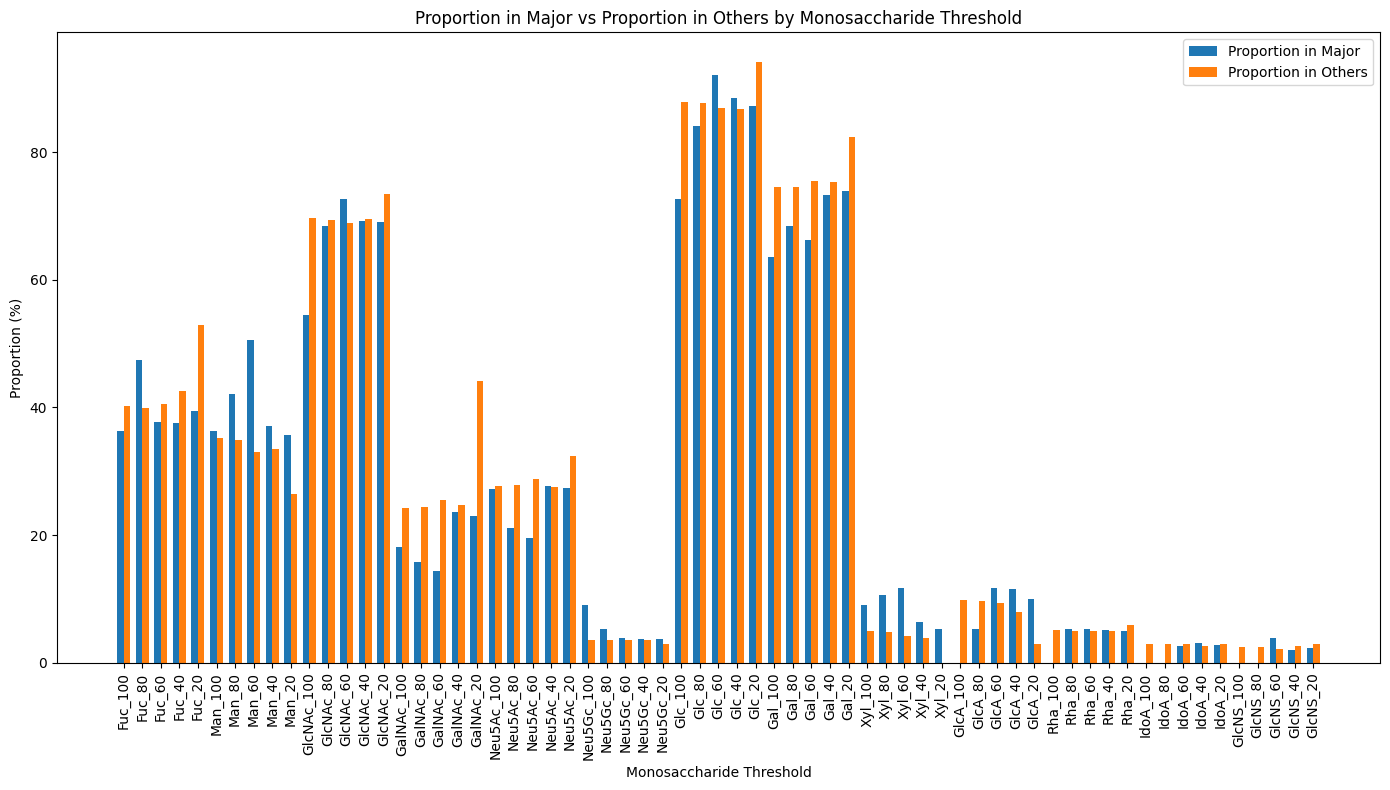

In [9]:
bar_width = 0.35
index = np.arange(len(df['Monosaccharide_threshold']))

# Plotting the bars
plt.figure(figsize=(14, 8))
bar1 = plt.bar(index, df['Proportion_in_major'], bar_width, label='Proportion in Major')
bar2 = plt.bar(index + bar_width, df['Proportion_in_others'], bar_width, label='Proportion in Others')

# Adding labels, title, and custom X-axis tick labels
plt.xlabel('Monosaccharide Threshold')
plt.ylabel('Proportion (%)')
plt.title('Proportion in Major vs Proportion in Others by Monosaccharide Threshold')
plt.xticks(index + bar_width / 2, df['Monosaccharide_threshold'], rotation=90)

# Adding the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
### Fixing only two groups: glycans with a cluster >=70 vs < 70
df = pd.DataFrame()
list_monothresh = []
list_major_prop = []
list_minor_prop = []
for mono in ['Fuc', 'Man', 'GlcNAc', 'GalNAc', 'Neu5Ac', 'Neu5Gc', 'Glc', 'Gal', 'Xyl', "GlcA", "Rha", "IdoA", "GlcNS", "a1-2", "a1-3", "a2-3", "a2-6", "a1-6", "b1-2", "b1-3", "b1-4", "3S", "6S", "Me"] : 
    for threshold in [70]:
        mono_threshold = mono + '_' + str(threshold)
        list_monothresh.append(mono_threshold)

        res = glycan_cluster_pattern(threshold, True)
        total_with_major = len(res[0])
        total_without_major = len(res[1])
        mono_containing_major = 0
        mono_containing_others = 0
        for g in res[0] :
            if mono in g :
                mono_containing_major = mono_containing_major + 1
        for g in res[1] :
            if mono in g :
                mono_containing_others = mono_containing_others + 1
        try :
            percent_major_containing_mono = mono_containing_major/total_with_major*100
        except :
            percent_major_containing_mono = 0

        try :
            percent_others_containing_mono = mono_containing_others/total_without_major*100
        except : 
            percent_others_containing_mono = 0

        list_major_prop.append(percent_major_containing_mono)
        list_minor_prop.append(percent_others_containing_mono)

df['Monosaccharide_threshold'] = list_monothresh
df['Proportion_in_major'] = list_major_prop
df['Proportion_in_others'] = list_minor_prop

In [11]:
df

Monosaccharide_threshold  Proportion_in_major  Proportion_in_others
0                    Fuc_70            42.857143             40.033223
1                    Man_70            45.714286             34.551495
2                 GlcNAc_70            77.142857             68.936877
3                 GalNAc_70             8.571429             25.083056
4                 Neu5Ac_70            20.000000             28.073090
5                 Neu5Gc_70             2.857143              3.654485
6                    Glc_70            91.428571             87.375415
7                    Gal_70            65.714286             74.916944
8                    Xyl_70            14.285714              4.485050
9                   GlcA_70             8.571429              9.634551
10                   Rha_70             5.714286              4.983389
11                  IdoA_70             2.857143              2.823920
12                 GlcNS_70             2.857143              2.325581
13                  a1-2_70            17.142857             24.584718
14                  a1-3_70            51.428571             52.823920
15                  a2-3_70            20.000000             21.760797
16                  a2-6_70             5.714286              9.966777
17                  a1-6_70            37.142857             30.564784
18                  b1-2_70            34.285714             31.893688
19                  b1-3_70            28.571429             40.697674
20                  b1-4_70            77.142857             74.086379
21                    3S_70             0.000000              0.996678
22                    6S_70             2.857143              3.156146
23                    Me_70             2.857143              1.162791

In [ ]:
### what about repeating the analysis by silhouette_clusters?

## 2 - Monosaccharide SASA and flexibility between glycan classes (N-/O- glycans)

In [23]:
glycoshape_glycans = get_glycoshape_IUPAC()
glycoshape_glycans = [g for g in glycoshape_glycans if '[2A]' not in g]
nglycans = []
other_glycans = []
for g in glycoshape_glycans :
    if 'Man(b1-4)GlcNAc(b1-4)' in g :
        nglycans.append(g)
    else :
        other_glycans.append(g)
print(len(nglycans))
print(len(other_glycans))

183
453


Flexibility

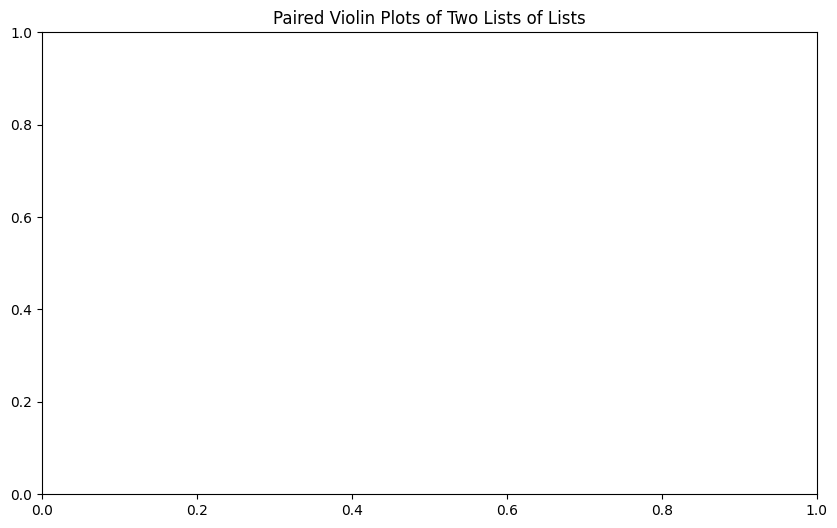

In [25]:
from glycowork.motif.annotate import *
from scipy.stats import ttest_ind

# N-glycans
mono_list = ['Neu5Gc', 'Neu5Ac', 'Fuc', 'Glc', 'GlcNAc', 'Gal', 'GalNAc', 'Man', 'Rha', 'Xyl', 'GlcA', 'IdoA']
nglycan_means = []
other_means = []
compo_all = get_k_saccharides(glycoshape_glycans, size = 1, just_motifs=True)
compo_all = {n: compo_all[i] for i, n in enumerate(glycoshape_glycans)}

for mono in mono_list :
    mono_mean_flex_across_glycans = [] #mean flexibility of all specified monosaccharides (ie Neu5Ac) in all tested glycans
    for g in nglycans :
        compo = compo_all[g]
        if mono in compo :
            my_glycans_path = "glycans_pdb/"
            try :
                isvt = inter_structure_variability_table(g, stereo = 'beta', mode = 'weighted')
                res = global_monosaccharide_unstability(isvt, mode='mean')
                val_list = [res[key] for key in res if mono in key]
                for v in val_list:
                    mono_mean_flex_across_glycans.append(v)
            except: 
                pass
                #print("This glycan failed: " + g)

    nglycan_means.append(mono_mean_flex_across_glycans)

    #Others
    mono_mean_flex_across_other_glycans = [] #mean flexibility of all specified monosaccharides (ie Neu5Ac) in all tested glycans
    for g in other_glycans :
        compo = compo_all[g]
        if mono in compo :
            my_glycans_path = "glycans_pdb/"
            try :
                isvt = inter_structure_variability_table(g, stereo = 'beta', mode = 'weighted')
                res = global_monosaccharide_unstability(isvt, mode='mean')
                val_list = [res[key] for key in res if mono in key]
                for v in val_list:
                    mono_mean_flex_across_other_glycans.append(v)
            except: 
                pass
                #print("This glycan failed: " + g)

    other_means.append(mono_mean_flex_across_other_glycans)

data = []
for i, (sublist1, sublist2) in enumerate(zip(nglycan_means, other_means)):
    data.extend([(value, mono_list[i], 'List 1') for value in sublist1])
    data.extend([(value, mono_list[i], 'List 2') for value in sublist2])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value', 'Pair', 'Group'])

# Create the paired violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pair', y='Value', hue='Group', data=df, split=True, inner="point")

# Add a title
plt.title('Paired Violin Plots of Two Lists of Lists')

# Save the plot to a file
#plt.savefig('paired_violinplots.png', dpi=300)

# Show the plot
plt.show()

In [26]:
res

(['Man3Me(a1-3)[Man3Me(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'IdoA2S(a1-4)GlcNS6S',
  'Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Glc',
  'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)][Fuc(a1-6)]GlcNAc',
  'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc',
  'Gal(b1-4)Glc',
  'GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  'Fuc',
  'Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc',
  'Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha(a1-3)Rha(a1-2)Gal(a1-3)

In [27]:

df

Empty DataFrame
Columns: [Value, Pair, Group]
Index: []

Results: 
- Neu5Ac, Neu5Gc, Fuc and Man are largely more flexible in N-glycans than in other glycan types
- GalNAc is slightly more flexible in N-glycans 
- GlcNAc and Xyl are slightly more flexible in other glycan types


SASA

In [ ]:
from glycowork.motif.annotate import *
from scipy.stats import ttest_ind

mono_list = ['Neu5Gc', 'Neu5Ac', 'Fuc', 'Glc', 'GlcNAc', 'Gal', 'GalNAc', 'Man', 'Rha', 'Xyl', 'GlcA', 'IdoA']
for mono in mono_list :
    mono_mean_flex_across_glycans = [] #mean flexibility of all specified monosaccharides (ie Neu5Ac) in all tested glycans
    for g in nglycans :
        compo = get_k_saccharides([g], size = 1, just_motifs=True)[0]
        if mono in compo :
            my_glycans_path = "glycans_pdb/"
            try :
                resdf = get_sasa_table(my_glycans_path, g, mode = 'beta')
                val_list = resdf['Weighted Score'][resdf['Monosaccharide'].str.contains(mono+'(', regex=False)==True].to_list()
                for v in val_list:
                    mono_mean_flex_across_glycans.append(v)
            except: 
                pass
                #print("This glycan failed: " + g)

    #Others
    mono_mean_flex_across_other_glycans = [] #mean flexibility of all specified monosaccharides (ie Neu5Ac) in all tested glycans
    for g in other_glycans :
        compo = get_k_saccharides([g], size = 1, just_motifs=True)[0]
        if mono in compo :
            my_glycans_path = "glycans_pdb/"
            try :
                resdf = get_sasa_table(my_glycans_path, g, mode = 'beta')
                val_list = resdf['Weighted Score'][resdf['Monosaccharide'].str.contains(mono+'(', regex=False)==True].to_list()
                for v in val_list:
                    mono_mean_flex_across_other_glycans.append(v)
            except: 
                pass
                #print("This glycan failed: " + g)


    data = pd.DataFrame({
        'Mean flexibility': mono_mean_flex_across_glycans + mono_mean_flex_across_other_glycans,
        'Glycan type': ['N-glycans'] * len(mono_mean_flex_across_glycans) + ['Other glycans'] * len(mono_mean_flex_across_other_glycans)
    })

    # Compute the p-value
    t_stat, p_value = ttest_ind(mono_mean_flex_across_glycans, mono_mean_flex_across_other_glycans)

    # Display the p-value on the plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Glycan type', y='Mean flexibility', data=data, inner="point")
    plt.text(0.5, max(mono_mean_flex_across_glycans + mono_mean_flex_across_other_glycans) * 0.95, f'p-value = {p_value:.3e}',
            horizontalalignment='center', size='medium', color='black', weight='semibold')


    # Save the plot to a file
    plt.savefig(mono + '_mean_sasa_between_glycans.png', dpi=300)

    # Create the violin plot

    plt.title('Mean SASA of ' + mono + ' between glycan types')
    plt.show()

In [ ]:
# N-glycans
mono_list = ['Neu5Gc', 'Neu5Ac', 'Fuc', 'Glc', 'GlcNAc', 'Gal', 'GalNAc', 'Man', 'Rha', 'Xyl', 'GlcA', 'IdoA']
nglycan_means = []
other_means = []

for mono in mono_list :
    mono_mean_flex_across_glycans = [] #mean flexibility of all specified monosaccharides (ie Neu5Ac) in all tested glycans
    for g in nglycans :
        compo = get_k_saccharides([g], size = 1, just_motifs=True)[0]
        if mono in compo :
            my_glycans_path = "glycans_pdb/"
            try :
                resdf = get_sasa_table(my_glycans_path, g, mode = 'beta')
                val_list = resdf['Weighted Score'][resdf['Monosaccharide'].str.contains(mono+'(', regex=False)==True].to_list()
                for v in val_list:
                    mono_mean_flex_across_glycans.append(v)
            except: 
                print("This glycan failed: " + g)

    nglycan_means.append(mono_mean_flex_across_glycans)

    #Others
    mono_mean_flex_across_other_glycans = [] #mean flexibility of all specified monosaccharides (ie Neu5Ac) in all tested glycans
    for g in other_glycans :
        compo = get_k_saccharides([g], size = 1, just_motifs=True)[0]
        if mono in compo :
            my_glycans_path = "glycans_pdb/"
            try :
                resdf = get_sasa_table(my_glycans_path, g, mode = 'beta')
                val_list = resdf['Weighted Score'][resdf['Monosaccharide'].str.contains(mono+'(', regex=False)==True].to_list()
                for v in val_list:
                    mono_mean_flex_across_other_glycans.append(v)
            except: 
                print("This glycan failed: " + g)

    other_means.append(mono_mean_flex_across_other_glycans)

data = []
for i, (sublist1, sublist2) in enumerate(zip(nglycan_means, other_means)):
    data.extend([(value, mono_list[i], 'List 1') for value in sublist1])
    data.extend([(value, mono_list[i], 'List 2') for value in sublist2])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value', 'Pair', 'Group'])

# Create the paired violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pair', y='Value', hue='Group', data=df, split=True, inner="point")

# Add a title
plt.title('Paired Violin Plots of Two Lists of Lists')

# Save the plot to a file
plt.savefig('paired_violinplots.png', dpi=300)

# Show the plot
plt.show()

## 3 - Silhouette analysis

In [ ]:

# Glycans can be converted to silhouette by just transforming monosaccharides to "X" or to monosaccharide types/class (like Hex, HexNAc...)
g = "Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"
print(convert_glycan_to_X(g))
print(convert_glycan_to_class(g))


XXNAcX[XNAc[XNAc]X]XXNAc[dX]XNAc


In [ ]:
glycoshape_glycans = get_glycoshape_IUPAC()
group_by_silhouette(glycoshape_glycans, 'class')

glycan  \
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...   
1    Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...   
266                                 GalNAc(a1-6)GalNAc   
57                                  GalNAc(a1-3)GalNAc   
125                                 GlcNAc(b1-4)GlcNAc   
..                                                 ...   
580  Gal(b1-3)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-3)[Ga...   
583       Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)Gal(b1-4)Glc   
585  Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc...   
586                              Fru(b2-1)Fru(b2-1)Fru   
587  Gal(a1-3)[Fuc(a1-2)]Gal(b1-3)GalNAc(b1-3)Gal(a...   

                                            silhouette  topological_group  
0    SiaXXNAc[SiaXXNAcX][SiaXXNAc[SiaXXNAcX]X]XNAcXNAc                  0  
1                                  dX[XXNAc]X[dXXNAc]X                  1  
266                                           XNAcXNAc                  2  
57                                            XNAcXNAc                  2  
125                                           XNAcXNAc                  2  
..                                                 ...                ...  
580                         XXNAc[XXNAc[XXNAcX]XNAcX]X                432  
583                                        dX[XXNAc]XX                433  
585                                  dXX[SiaXXNAcXNAc]                434  
586                                          UnkUnkUnk                435  
587                                      X[dXX]XNAcXXX                436  

[588 rows x 3 columns]

In [5]:
glycoshape_glycans = get_glycoshape_IUPAC()
sil = group_by_silhouette(glycoshape_glycans)
sil_class = group_by_silhouette(glycoshape_glycans, 'class')
print(sil)

#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(sil['topological_group'].to_list())
print(c.most_common())

c_class = Counter(sil_class['topological_group'].to_list())
print(c_class.most_common())

                                                glycan  \
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...   
1    Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...   
278                                    Gal(a1-3)GalNAc   
266                                 GalNAc(a1-6)GalNAc   
247                                       Glc(a1-4)Rha   
..                                                 ...   
569  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...   
571  Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)M...   
573  Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)Glc...   
577  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...   
580  Gal(b1-3)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-3)[Ga...   

                  silhouette  topological_group  
0    XXX[XXX]X[XXX[XXX]X]XXX                  0  
1                X[X]XX[X]XX                  1  
278                       XX                  2  
266                       XX                  2  
247                       XX                  2  
.. 

In [6]:
sil[sil['topological_group'].values==4]

glycan silhouette  topological_group
510        Gal(a1-3)Gal(b1-3)GalNAc        XXX                  4
416  Neu5Gc(a2-8)Neu5Gc(a2-6)GalNAc        XXX                  4
176         GalA(a1-4)GlcA(b1-4)Glc        XXX                  4
175        Man(a1-3)Man(a1-3)GlcNAc        XXX                  4
169           Rha(a1-2)Rha(a1-2)Gal        XXX                  4
159        Gal(b1-4)GlcNAc(b1-2)Man        XXX                  4
502     GlcA3S(b1-3)Gal(b1-4)GlcNAc        XXX                  4
149          Glc(b1-4)GlcA(a1-3)Fuc        XXX                  4
439           Xyl(a1-3)Xyl(a1-3)Glc        XXX                  4
139     Neu5Gc(a2-6)Gal(b1-4)GlcNAc        XXX                  4
134        GlcNAc(b1-3)Gal(b1-4)Glc        XXX                  4
131     Neu5Ac(a2-6)Gal(b1-4)GlcNAc        XXX                  4
447        Neu5Ac(a2-3)Gal(b1-4)Glc        XXX                  4
126        GalNAc(a1-4)Gal(b1-4)Glc        XXX                  4
450     Neu5Ac(a2-3)Gal(b1-4)GlcNAc        XXX                  4
119     Man(b1-4)GlcNAc(b1-4)GlcNAc        XXX                  4
116    GalNAc(b1-4)GlcA(b1-3)GalNAc        XXX                  4
106  Neu5Ac(a2-6)GalNAc(a1-3)GlcNAc        XXX                  4
105     Neu5Ac(a2-3)Gal(b1-3)GlcNAc        XXX                  4
93     GlcNAc(a1-4)GlcA(b1-4)GlcNAc        XXX                  4
92      Neu5Gc(a2-3)Gal(b1-3)GlcNAc        XXX                  4
186  Neu5Ac(a2-9)Neu5Ac(a2-9)Neu5Ac        XXX                  4
491        GalNAc(b1-4)Gal(b1-4)Glc        XXX                  4
410     Neu5Gc(a2-3)Gal(b1-4)GlcNAc        XXX                  4
406  GlcNAc(b1-4)GlcNAc(b1-4)GlcNAc        XXX                  4
308  Neu5Ac(a2-6)GalNAc(b1-3)GlcNAc        XXX                  4
579           Rha(a1-2)Rha(a1-2)Rha        XXX                  4
582           Rha(a1-3)Rha(a1-2)Gal        XXX                  4
328        Neu5Gc(a2-3)Gal(b1-4)Glc        XXX                  4
586           Fru(b2-1)Fru(b2-1)Fru        XXX                  4
291  Neu5Ac9Me(a2-3)Gal(b1-3)GlcNAc        XXX                  4
332  Neu5Gc9Me(a2-3)Gal(b1-3)GlcNAc        XXX                  4
333     GalNAc(b1-3)GlcNAc(b1-4)Man        XXX                  4
4       Neu5Ac(a2-3)Gal(b1-3)GalNAc        XXX                  4
275  Neu5Ac9Ac(a2-6)Gal(b1-4)GlcNAc        XXX                  4
273        Gal(b1-4)GlcNAc(b1-3)Fuc        XXX                  4
346        Fuc(a1-2)Gal(b1-3)GlcNAc        XXX                  4
348           Man(b1-4)Gal(a1-4)Rha        XXX                  4
545           Glc(a1-6)Glc(a1-3)Glc        XXX                  4
537           Glc(a1-3)Glc(a1-6)Glc        XXX                  4
356        Neu5Ac(a2-6)Gal(b1-4)Glc        XXX                  4
229  Neu5Ac9Ac(a2-3)Gal(b1-4)GlcNAc        XXX                  4
228  Neu5Ac(a2-6)GalNAc(a1-3)GalNAc        XXX                  4
516           Ara(b1-2)Ara(b1-2)Ara        XXX                  4
218     Neu5Gc(a2-3)Gal(b1-3)GalNAc        XXX                  4
393        Fuc(a1-2)Gal(b1-3)GalNAc        XXX                  4
409  GlcNAc(b1-6)GlcNAc(b1-6)GlcNAc        XXX                  4
469           Gal(b1-6)Gal(b1-4)Glc        XXX                  4
415        Fuc(a1-2)Gal(b1-4)GlcNAc        XXX                  4
45            Glc(a1-6)Man(a1-3)Gal        XXX                  4
83            Gal(b1-2)Ara(b1-2)Ara        XXX                  4
82            Gal(a1-4)Gal(b1-4)Glc        XXX                  4
61   Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac        XXX                  4
69      Gal(b1-3)GalNAc(a1-3)GlcNAc        XXX                  4
43            Gal(b1-3)Gal(b1-4)Glc        XXX                  4
490       GlcA(b1-3)GlcNAc(a1-2)Gal        XXX                  4

In [14]:
sil_class[sil_class['topological_group'].values==35]

glycan silhouette  topological_group
112  Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)Glc   SiaSiaXX                 35
226  Neu5Ac(a2-8)Neu5Gc(a2-3)Gal(b1-4)Glc   SiaSiaXX                 35
89   Neu5Gc(a2-8)Neu5Ac(a2-3)Gal(b1-4)Glc   SiaSiaXX                 35
37   Neu5Gc(a2-8)Neu5Gc(a2-3)Gal(b1-4)Glc   SiaSiaXX                 35

For a given conformational group, check if the cluster frequency distribution is the same 

In [8]:
topo_group = 4
g_with_major, g_without_major = glycan_cluster_pattern(threshold = 50) 
topo_major = []
topo_other = []
print("Glycans with one major cluster:\n")
for g in sil_class['glycan'][sil_class['topological_group']==topo_group].to_list():
    if g in g_with_major :
        print(g + ' ' + str(get_glycan_clusters_frequency(g)))
        topo_major.append(g)

print("\nGlycans without a major cluster:\n")
for g in sil_class['glycan'][sil_class['topological_group']==topo_group].to_list():
    if g in g_without_major :
        print(g + ' ' + str(get_glycan_clusters_frequency(g)))
        topo_other.append(g)

Number of glycans with one major cluster: 127
Number of glycans without a major cluster: 449
Glycans with one major cluster:

Neu5Gc9Me(a2-3)Gal(b1-3)GlcNAc [67.48, 18.27, 14.25]
Neu5Ac(a2-3)Gal(b1-3)GlcNAc [74.11, 21.74, 4.15]
Neu5Gc(a2-3)Gal(b1-4)GlcNAc [55.73, 22.87, 10.93, 10.48]
Neu5Ac(a2-6)Gal(b1-4)GlcNAc [50.72, 25.52, 23.75]
Neu5Ac9Me(a2-3)Gal(b1-3)GlcNAc [51.59, 31.63, 16.78]

Glycans without a major cluster:

Neu5Ac9Ac(a2-3)Gal(b1-4)GlcNAc [43.26, 36.32, 20.42]
Neu5Gc(a2-6)Gal(b1-4)GlcNAc [49.39, 26.76, 23.85]
Neu5Ac9Ac(a2-6)Gal(b1-4)GlcNAc [40.72, 25.82, 17.81, 15.65]
Neu5Ac(a2-3)Gal(b1-4)GlcNAc [32.42, 30.01, 20.87, 9.29, 7.41]
Neu5Gc(a2-3)Gal(b1-3)GalNAc [18.29, 18.07, 13.92, 13.71, 12.62, 7.68, 7.37, 5.16, 3.19]
Neu5Gc(a2-3)Gal(b1-3)GlcNAc [21.8, 18.2, 17.57, 15.39, 8.44, 8.36, 3.96, 3.48, 2.8]
Neu5Ac(a2-3)Gal(b1-3)GalNAc [39.66, 24.61, 15.99, 15.82, 3.92]


In [10]:
#for all topological groups, show the number of glycans with one major cluster vs no major cluster for a given threshold (50?)

g_with_major, g_without_major = glycan_cluster_pattern(threshold = 50) 
topo_list = []
nb_with_major = []
nb_without_major = []
tot_list = []


for topo_group in list(set(sil_class['topological_group'].to_list())):
    topo_list.append(topo_group)

    topo_major = []
    topo_other = []
    for g in sil_class['glycan'][sil_class['topological_group']==topo_group].to_list():
        if g in g_with_major :
            topo_major.append(g)

    for g in sil_class['glycan'][sil_class['topological_group']==topo_group].to_list():
        if g in g_without_major :
            topo_other.append(g)
    tot = len(topo_major) + len(topo_other)
    tot_list.append(tot)
    try :
        topo_major = len(topo_major)/tot*100
    except : 
        topo_major = 0
    
    try :
        topo_other = len(topo_other)/tot*100
    except :
        topo_other = 0


    nb_with_major.append(topo_major)
    nb_without_major.append(topo_other)

sil_clust = pd.DataFrame()
sil_clust['Group'] = topo_list
sil_clust['Percent_with_major_clust'] = nb_with_major
sil_clust['Percent_without_major_clust'] = nb_without_major
sil_clust['Total_number_of_glycans'] = tot_list

Number of glycans with one major cluster: 127
Number of glycans without a major cluster: 449


In [11]:
sil_clust

Group  Percent_with_major_clust  Percent_without_major_clust  \
0        0                100.000000                     0.000000   
1        1                  0.000000                   100.000000   
2        2                 16.666667                    83.333333   
3        3                  0.000000                   100.000000   
4        4                 41.666667                    58.333333   
..     ...                       ...                          ...   
432    432                  0.000000                     0.000000   
433    433                  0.000000                   100.000000   
434    434                  0.000000                   100.000000   
435    435                  0.000000                   100.000000   
436    436                  0.000000                   100.000000   

     Total_number_of_glycans  
0                          1  
1                          1  
2                          6  
3                          1  
4                         12  
..                       ...  
432                        0  
433                        1  
434                        1  
435                        1  
436                        1  

[437 rows x 4 columns]

In [13]:
# which groups have more than 75% of there glycans that have (or haven't) a major cluster?

#pre-select only clusters with at least a total of 10 glycans
sil_clust=sil_clust[sil_clust['Total_number_of_glycans'].values >= 4]
sil_with_major = sil_clust['Group'][sil_clust['Percent_with_major_clust'].values >= 50].to_list()

sil_without_major = sil_clust['Group'][sil_clust['Percent_without_major_clust'].values >= 50].to_list()

print("Silhouettes with more than 75 of their glycans with a major cluster")
for s in sil_with_major :
    print(sil_class['silhouette'][sil_class['topological_group'].values==s].to_list()[0])

print("Silhouettes with more than 75 of their glycans without a major cluster")
for s in sil_without_major :
    print(str(s) + ' ' + sil_class['silhouette'][sil_class['topological_group'].values==s].to_list()[0])


Silhouettes with more than 75 of their glycans with a major cluster
SiaSiaXX
Silhouettes with more than 75 of their glycans without a major cluster
2 XNAcXNAc
4 SiaXXNAc
15 XXNAcX[XXNAcX]XXNAc[dX]XNAc
26 SiaX[dX]XNAc
29 XX
35 SiaSiaXX
36 SiaXXNAcXX
41 XXX
42 XAXNAcXAXNAc
70 SiaXXNAcX[SiaXXNAcX]XXNAc[dX]XNAc
122 SiaXXNAcX[SiaXXNAcX]XXNAcXNAc
127 XXXXX
155 XXNAc


No glycan silhouette (larger than 4 glycans) contains more than 50% of glycans with a major cluster. However, several glycan silhouettes have a very low number of glycans with a major cluster.

7 silhouettes contain more than 90% of glycans without a major cluster: 
- X[X]XXXXX
- XXX[XXX]XX[X]X
- XX[X]X
- XXXX[XXXX]XX[X]X
- XXXXXXXX
- XXXXXX
- XXX[XXX]X

They can be grouped in 3 categories:
- XX[X]X-root and/or XXX[XXX]X terminated:
    XX[X]X
    XXX[XXX]X
    XXX[XXX]XX[X]X
    XXXX[XXXX]XX[X]X
- linear:
    XXXXXX
    XXXXXXXX
- other:
    X[X]XXXXX



In [15]:
#what are these glycans?

sil_without_major = sil_clust['Group'][sil_clust['Percent_without_major_clust'].values >= 90].to_list()
for s in sil_without_major :
    print(sil_class['silhouette'][sil_class['topological_group'].values==s].to_list()[0])
    c_list = sil_class['glycan'][sil_class['topological_group'].values==s].to_list()
    for g in c_list :
        print(g)




XXNAcX[XXNAcX]XXNAc[dX]XNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
SiaX[dX]XNAc
Neu5Gc(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc
Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc
Neu5Ac9Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc
Neu5Ac(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc
Neu5Gc(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc
SiaXXNAcX[SiaXXNAcX]XXNAc[dX]XNAc
Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(

Conclusion: In most cases, silhouettes DO NOT determine if the corresponding glycans will have a major cluster or not. Composition and sequence seem more important to determine glycan structural properties. Even when silhouettes do show almost all corresponding glycans to have (or not) a major cluster, it is in fact because they show a highly similar composition. 
It also means that glycans with the same silhouette can have very different structural behaviors because of a different composition or linkage. This will be studied below using sialylated N-glycans.

In [69]:
# Do monosaccharides in glycans with a given silhouette have similar structural properties when at the same position, even if different?

#group 42 and 71
glycan_list = sil_class['glycan'][sil_class['topological_group'].values==155].to_list()

list_of_res = []
list_of_mono = []
dict_res = {}
valid_list = []
for g in glycan_list :
    print(g)
    my_glycans_path = "glycans_pdb/"
    try :
        currlist = []
        resdf = get_sasa_table(my_glycans_path, g, mode = 'beta')
        res = [v for v in resdf['Weighted Score'].to_list()]
        if len(res) != len(g.split('-'))+1:
            break
        monolist = [v for v in resdf['Monosaccharide'].to_list()]
        list_of_res.append(res)
        dict_res[g] = res
        
        for x in range(0,len(res)):
            currlist.append(monolist[x].replace('(','\n(') + '\n' + str(round(res[x],ndigits= 2)))
            print(monolist[x] + ' : ' + str(res[x]))
        list_of_mono.append(currlist)
        valid_list.append(g)
    except: 
        print("This glycan failed: " + g)
        



Glc(b1-6)GlcNAc
-R : 0.38935668597221373
GlcNAc(b1-1) : 3.0824089112394493
Glc(b1-6) : 2.8272419223867353
Glc(b1-3)GalNAc
-R : 0.44718972798788886
GalNAc(b1-1) : 2.9830332787814724
Glc(b1-3) : 2.5972610214936904
Gal(b1-3)GalNAc
-R : 0.4549887524117636
GalNAc(b1-1) : 3.0201731577644324
Gal(b1-3) : 2.576634855442119
Gal(a1-3)GalNAc
-R : 0.467532562379539
GalNAc(b1-1) : 2.887337081704626
Gal(a1-3) : 2.5650677551784318


<Figure size 1000x600 with 0 Axes>

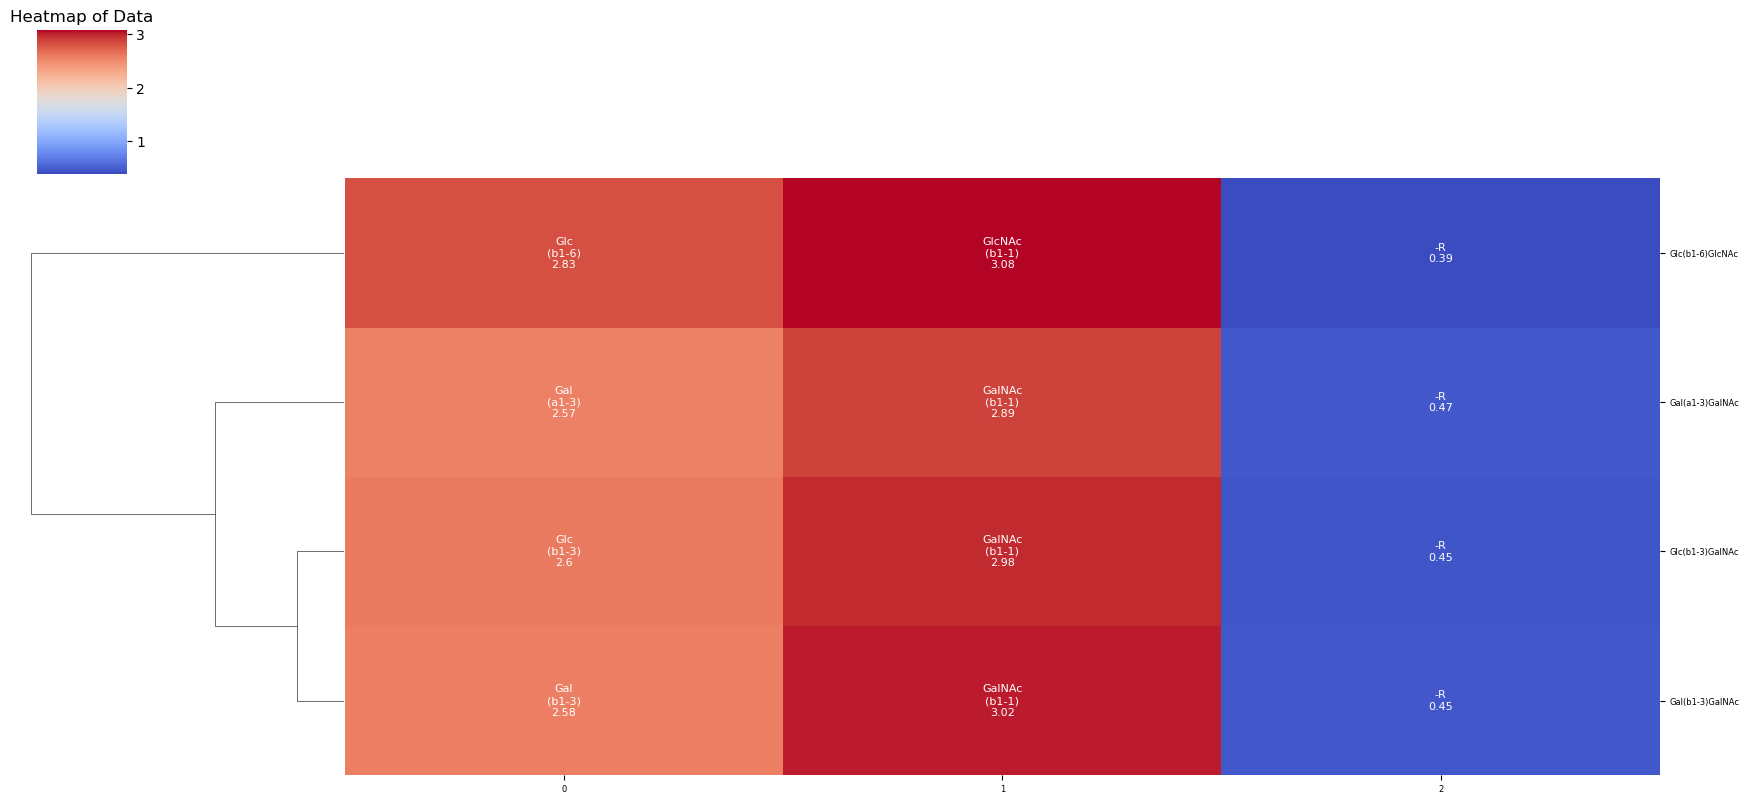

In [70]:
# Create the heatmap
data_inverted = [row[::-1] for row in list_of_res]
annotations_inverted = [row[::-1] for row in list_of_mono]  # Reverses each row (i.e., the columns)

plt.figure(figsize=(10, 6))  # Adjust size if needed
g = sns.clustermap(data_inverted, annot=annotations_inverted, fmt="", cmap="coolwarm", yticklabels=valid_list, row_cluster=True, col_cluster=False, figsize=(18, 8), annot_kws={"size": 8})
# Adjust the font size of the column and row labels
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=6)  # Decrease column label font size
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=6)  # Decrease column label font size
# Rotate column labels if necessary

# Show the heatmap
plt.title('Heatmap of Data')
plt.show()

In [71]:

glycan_list = sil_class['glycan'][sil_class['topological_group'].values==155].to_list()

list_of_res = []
list_of_mono = []
dict_res = {}
valid_list = []
for g in glycan_list :
    print(g)
    my_glycans_path = "glycans_pdb/"
    try :
        isvt = inter_structure_variability_table(my_glycans_path, g, link_type = 'beta', mode = 'weighted' )
        res = global_monosaccharide_unstability(isvt, mode='mean')
        if len(res) != len(g.split('-'))+1:
            break
        print(res)
        val_list = [res[key] for key in res]
        mono_list = [key.replace('(','\n(') + '\n' + str(round(res[key],ndigits= 2)) for key in res]
        list_of_res.append(val_list)
        dict_res[g] = res
        list_of_mono.append(mono_list)
        valid_list.append(g)

    except: 
        print("This glycan failed: " + g)

Glc(b1-6)GlcNAc
{'1_-R': 1.2797255999999977, '2_GlcNAc(b1-1)': 0.30772249999999984, '3_Glc(b1-6)': 1.2306857000000015}
Glc(b1-3)GalNAc
{'1_-R': 0.6428357664233567, '2_GalNAc(b1-1)': 0.4779622037796216, '3_Glc(b1-3)': 0.7351411858814099}
Gal(b1-3)GalNAc
{'1_-R': 0.5388754542120858, '2_GalNAc(b1-1)': 0.27686715338200396, '3_Gal(b1-3)': 0.4938660866086625}
Gal(a1-3)GalNAc
{'1_-R': 0.32547753333333407, '2_GalNAc(b1-1)': 0.24395023333333152, '3_Gal(a1-3)': 0.2582072999999985}


<Figure size 1000x600 with 0 Axes>

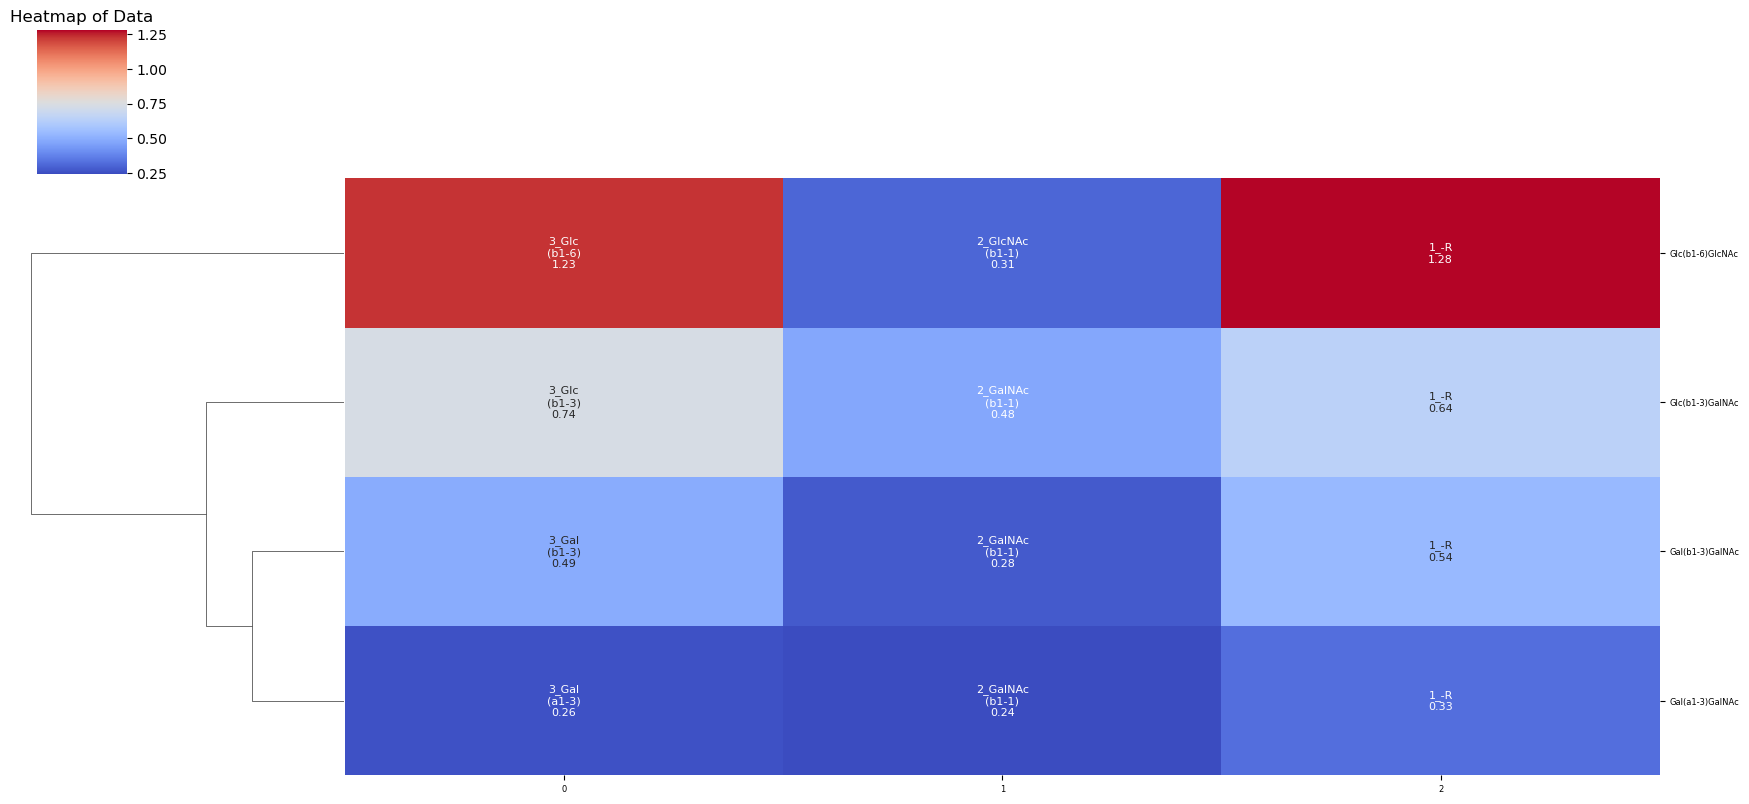

In [72]:
#/!\ les effets vus précédemment avec les branches Neu5Ac ne fonctionnent pas en weighted!


# Create the heatmap
data_inverted = [row[::-1] for row in list_of_res]
annotations_inverted = [row[::-1] for row in list_of_mono]  # Reverses each row (i.e., the columns)

plt.figure(figsize=(10, 6))  # Adjust size if needed
g = sns.clustermap(data_inverted, annot=annotations_inverted, fmt="", cmap="coolwarm", yticklabels=valid_list, row_cluster=True, col_cluster=False, figsize=(18, 8), annot_kws={"size": 8})
# Adjust the font size of the column and row labels
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=6)  # Decrease column label font size
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=6)  # Decrease column label font size
# Rotate column labels if necessary

# Show the heatmap
plt.title('Heatmap of Data')
plt.show()

In [73]:
#having a lot of modified (sulfated) monosaccharides seems to increase flexibility, particularly for leaves monosaccharides
#(a1-6)/(b1-6) seems to lead to increased flexibility (especially with Glc)

## 4 - N-glycan biosynthesis

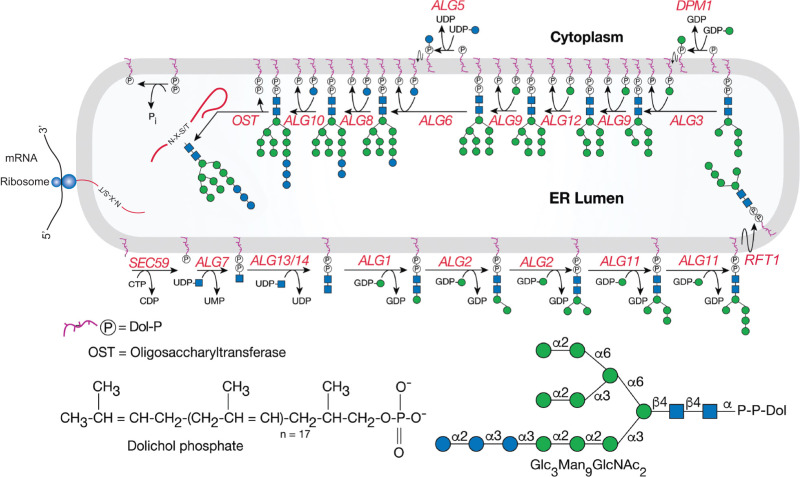

In [74]:
nglycan_path = ['GlcNAc','GlcNAc(b1-4)GlcNAc','Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-3)Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Glc(a1-3)Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc']

This glycan failed: GlcNAc
-R : 0.4705331558614969
GlcNAc(b1-1) : 2.801295384644577
GlcNAc(b1-4) : 3.2938918659032907
-R : 0.42867445393465464
GlcNAc(b1-1) : 2.877753615277843
GlcNAc(b1-4) : 2.619680749829649
Man(b1-4) : 2.5937559717880103
This glycan failed: Man(a1-3)Man(b1-4)GlcNAc(b1-4)GlcNAc
-R : 0.46261512198597193
GlcNAc(b1-1) : 2.8792579362440502
GlcNAc(b1-4) : 2.4421070053226313
Man(b1-4) : 1.1034953833537875
Man(a1-6) : 2.76768229887049
Man(a1-3) : 2.5584251712387895
This glycan failed: Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
This glycan failed: Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
This glycan failed: Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
This glycan failed: Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
-R : 0.4717589062407613
GlcNAc(b1-1) : 2.6636482112832134
GlcNAc(b1-4) : 1.7421617872090778
Man(b1-4) : 0.8671359575405252
Man(a1-3) : 1.778388873619854
Man(

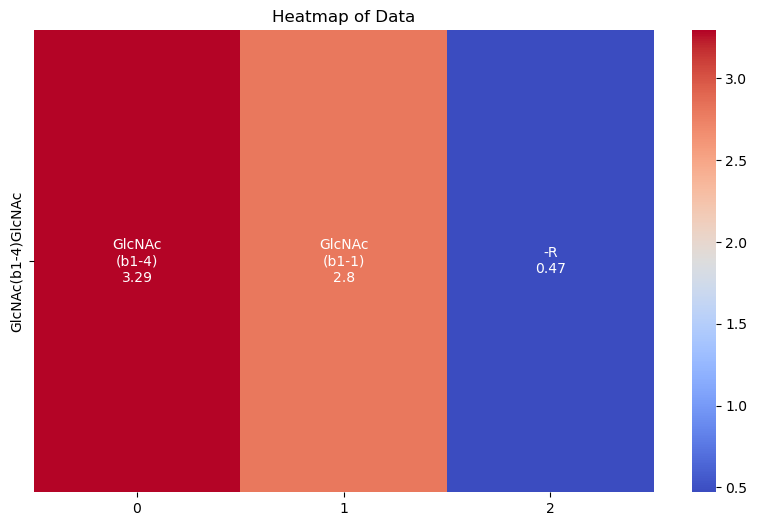

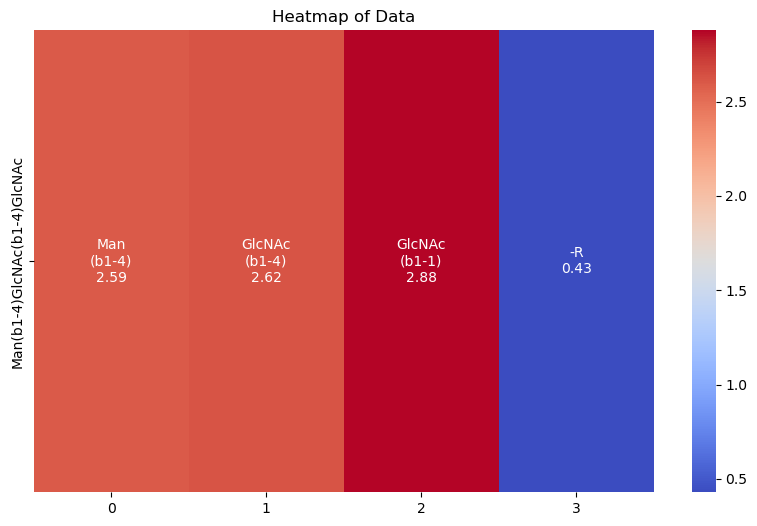

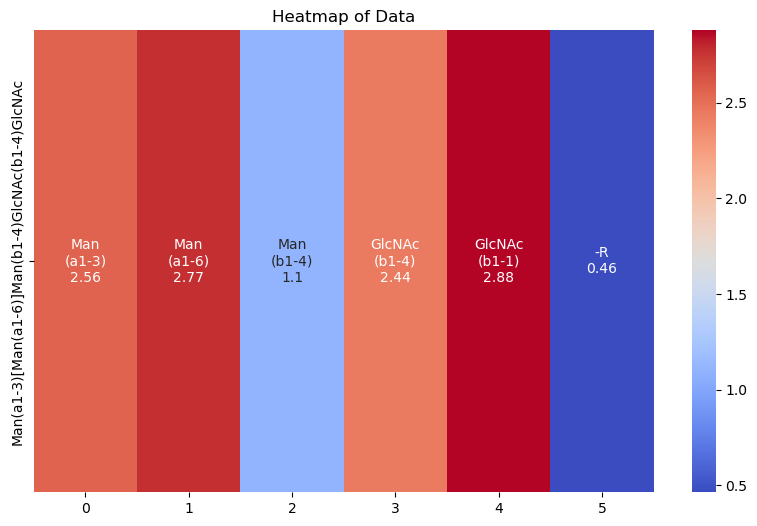

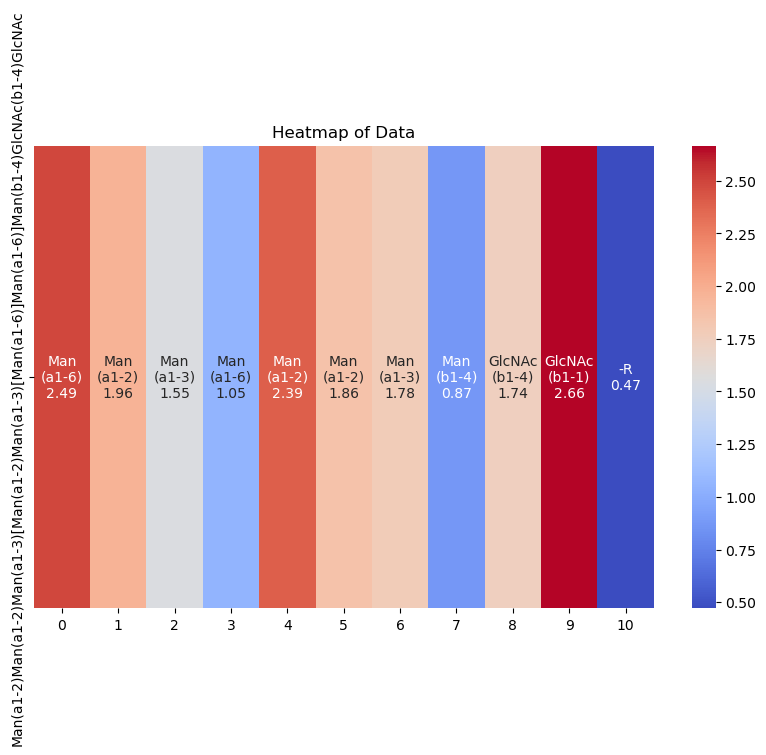

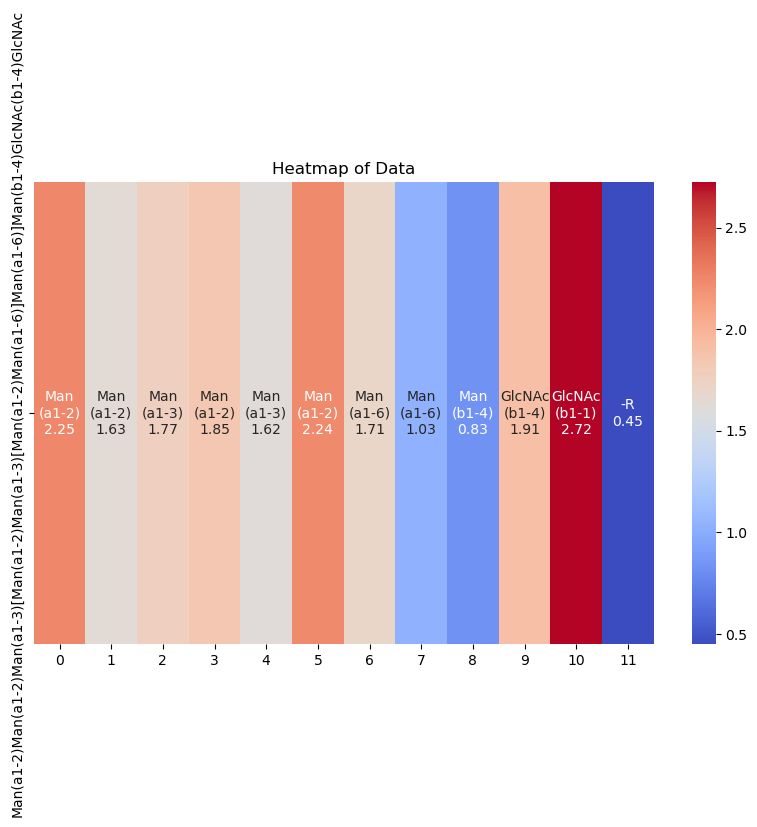

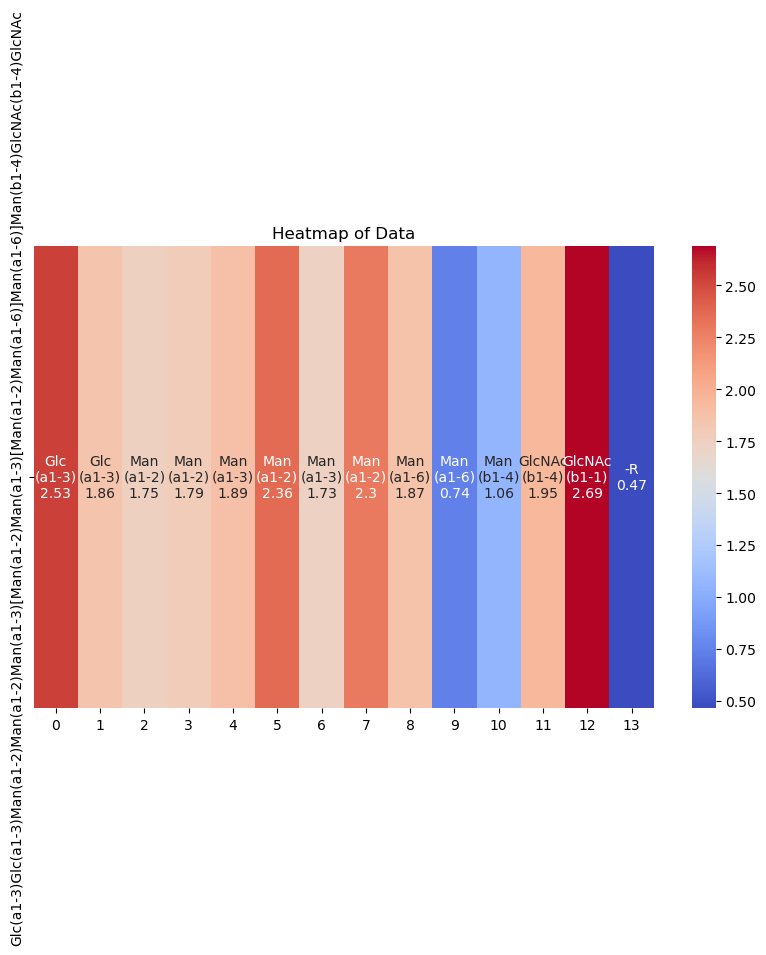

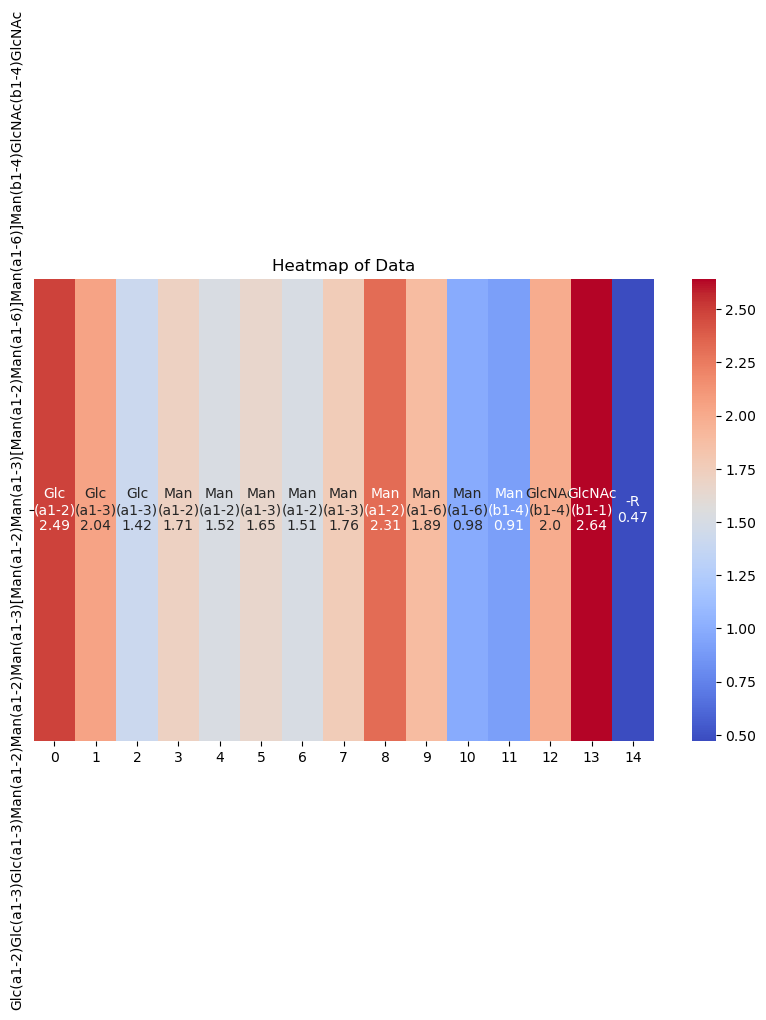

In [75]:
for g in nglycan_path :
    list_of_res = []
    list_of_mono = []
    dict_res = {}
    valid_list = []
    my_glycans_path = "glycans_pdb/"
    try :
        currlist = []
        resdf = get_sasa_table(my_glycans_path, g, mode = 'beta')
        res = [v for v in resdf['Weighted Score'].to_list()]
        monolist = [v for v in resdf['Monosaccharide'].to_list()]
        list_of_res.append(res)
        dict_res[g] = res
        
        for x in range(0,len(res)):
            currlist.append(monolist[x].replace('(','\n(') + '\n' + str(round(res[x],ndigits= 2)))
            print(monolist[x] + ' : ' + str(res[x]))
        list_of_mono.append(currlist)
        valid_list.append(g)
        data_inverted = [row[::-1] for row in list_of_res]
        annotations_inverted = [row[::-1] for row in list_of_mono]  # Reverses each row (i.e., the columns)

        plt.figure(figsize=(10, 6))  # Adjust size if needed
        sns.heatmap(data_inverted, annot=annotations_inverted, fmt="", cmap="coolwarm", yticklabels=valid_list)
        # Adjust the font size of the column and row labels

        # Rotate column labels if necessary

        # Show the heatmap
        plt.title('Heatmap of Data')
        plt.savefig(str(g) + '_heatmap_SASA.png', dpi=300, bbox_inches='tight')

    except: 
        print("This glycan failed: " + g)
    

In [ ]:
# Create the heatmap


This glycan failed: GlcNAc
This glycan failed: Man(a1-3)Man(b1-4)GlcNAc(b1-4)GlcNAc
This glycan failed: Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
This glycan failed: Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
This glycan failed: Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
This glycan failed: Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
This glycan failed: Glc(a1-3)Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc


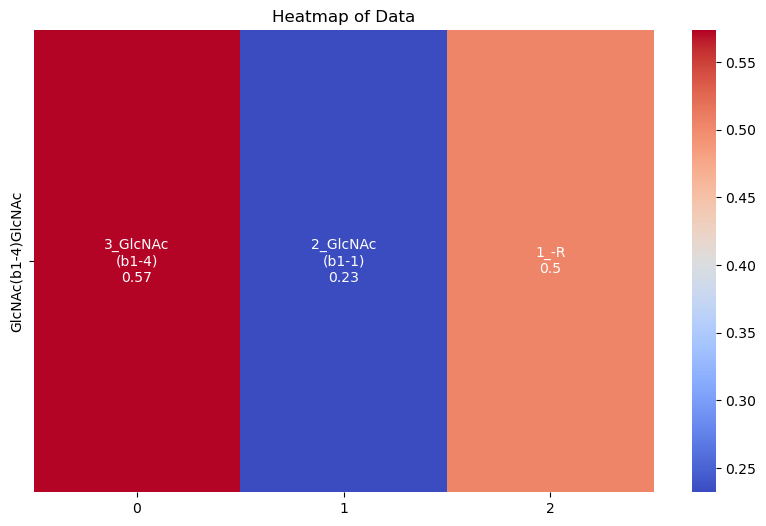

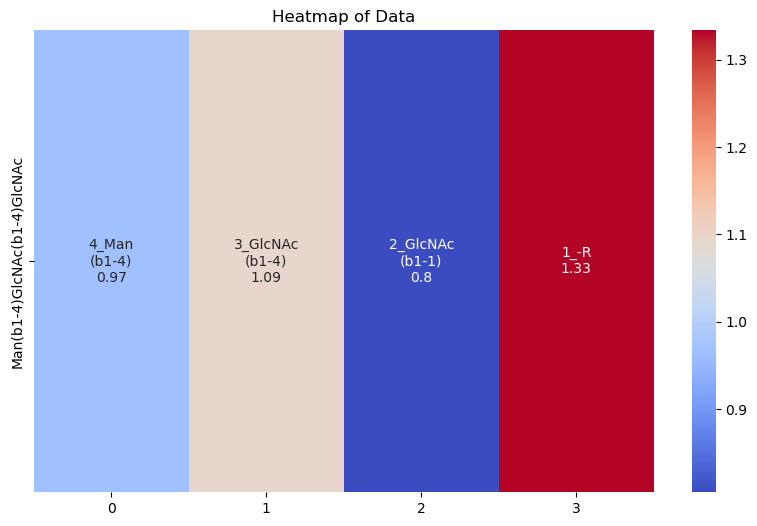

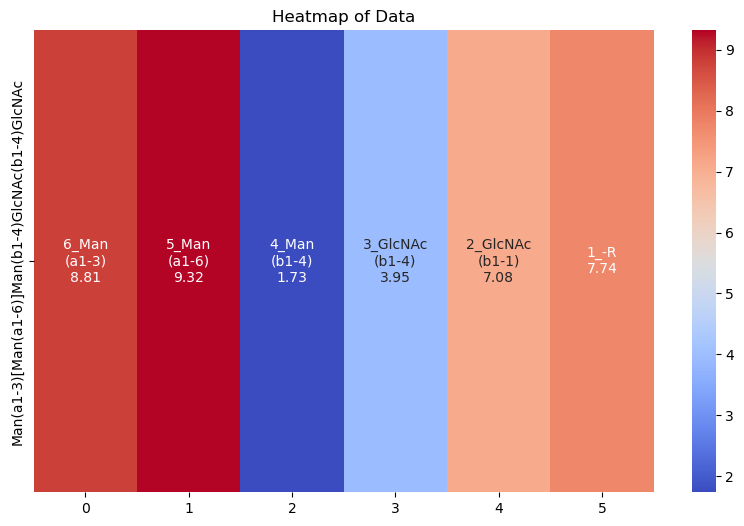

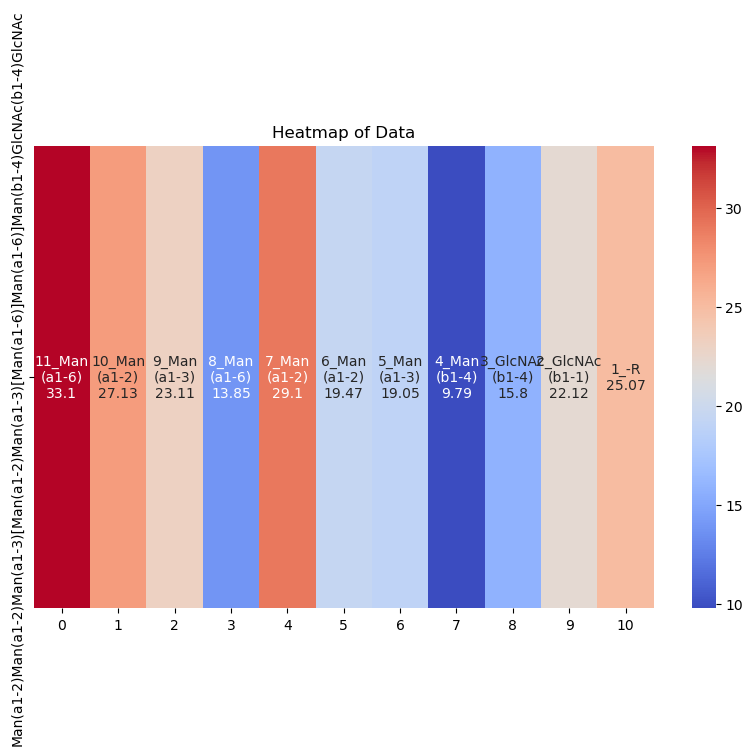

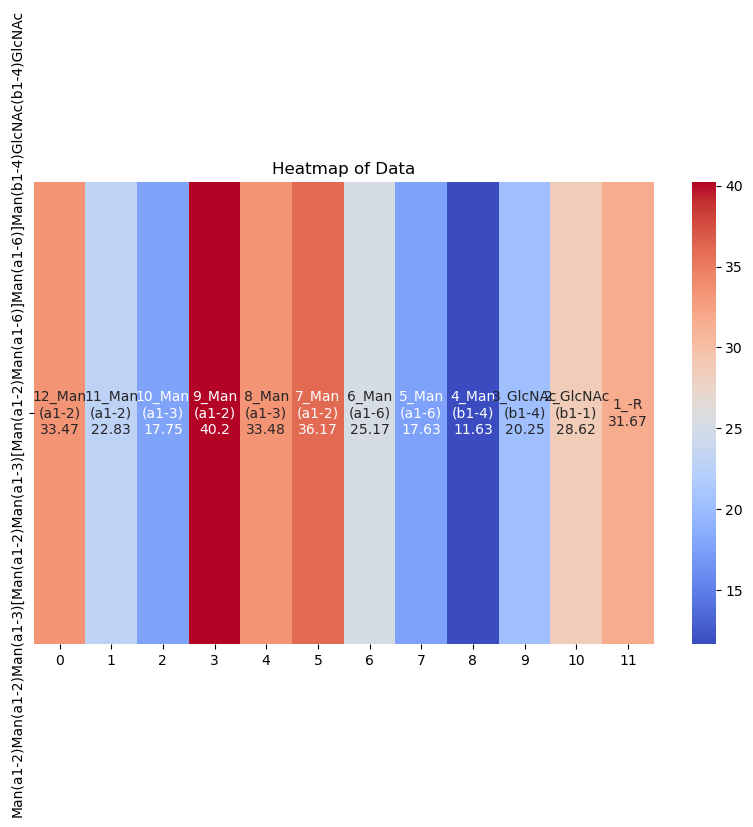

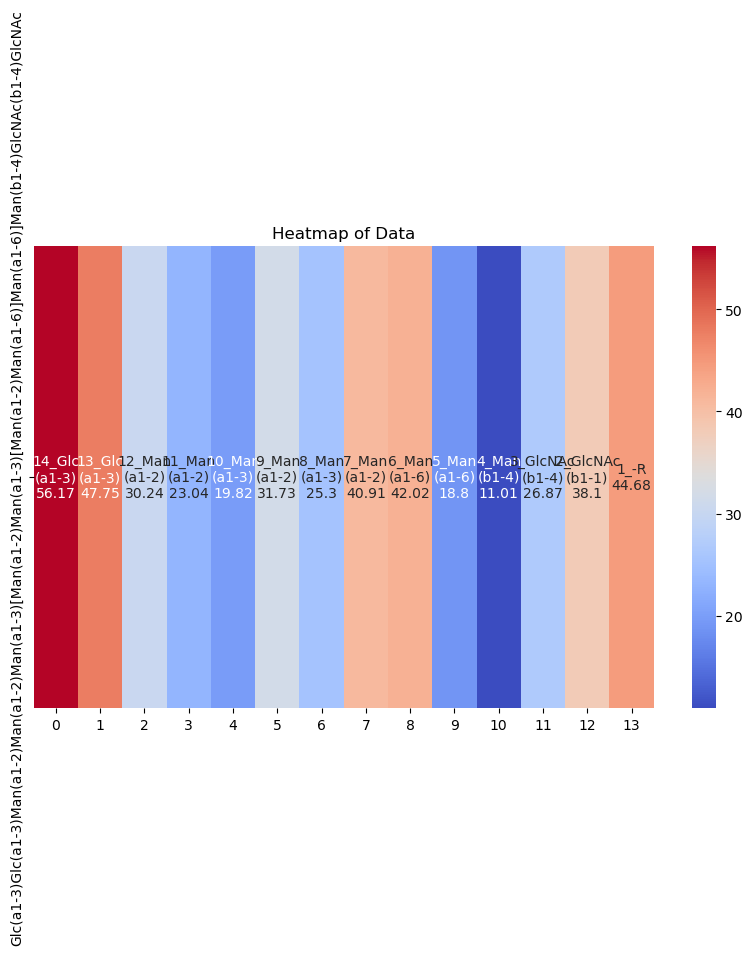

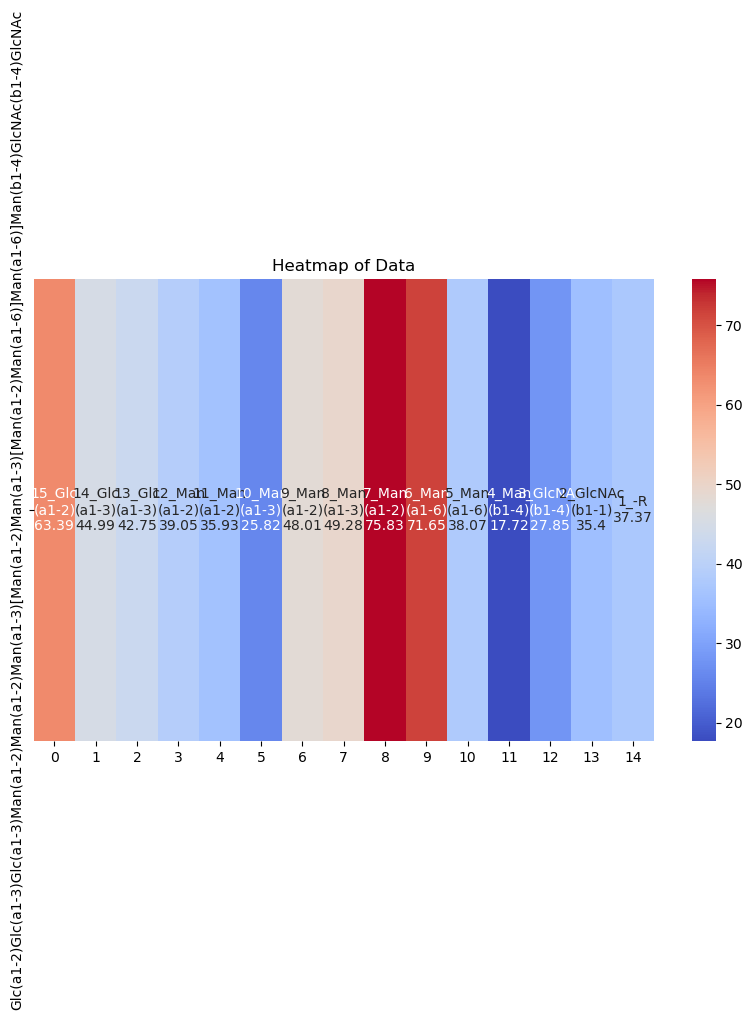

In [76]:
for g in nglycan_path :
    list_of_res = []
    list_of_mono = []
    dict_res = {}
    valid_list = []
    my_glycans_path = "glycans_pdb/"
    try :
        currlist = []
        isvt = inter_structure_variability_table(my_glycans_path, g, link_type = 'beta', mode = 'weighted' )
        res = global_monosaccharide_unstability(isvt, mode='mean')
        val_list = [res[key] for key in res]
        mono_list = [key.replace('(','\n(') + '\n' + str(round(res[key],ndigits= 2)) for key in res]
        list_of_res.append(val_list)
        dict_res[g] = res
        list_of_mono.append(mono_list)
        valid_list.append(g)


        data_inverted = [row[::-1] for row in list_of_res]
        annotations_inverted = [row[::-1] for row in list_of_mono]  # Reverses each row (i.e., the columns)


        plt.figure(figsize=(10, 6))  # Adjust size if needed
        sns.heatmap(data_inverted, annot=annotations_inverted, fmt="", cmap="coolwarm", yticklabels=valid_list)
        # Adjust the font size of the column and row labels

        # Rotate column labels if necessary

        # Show the heatmap
        plt.title('Heatmap of Data')
        plt.savefig(str(g) + '_heatmap_flexibility.png', dpi=300, bbox_inches='tight')

    except: 
        print("This glycan failed: " + g)
    

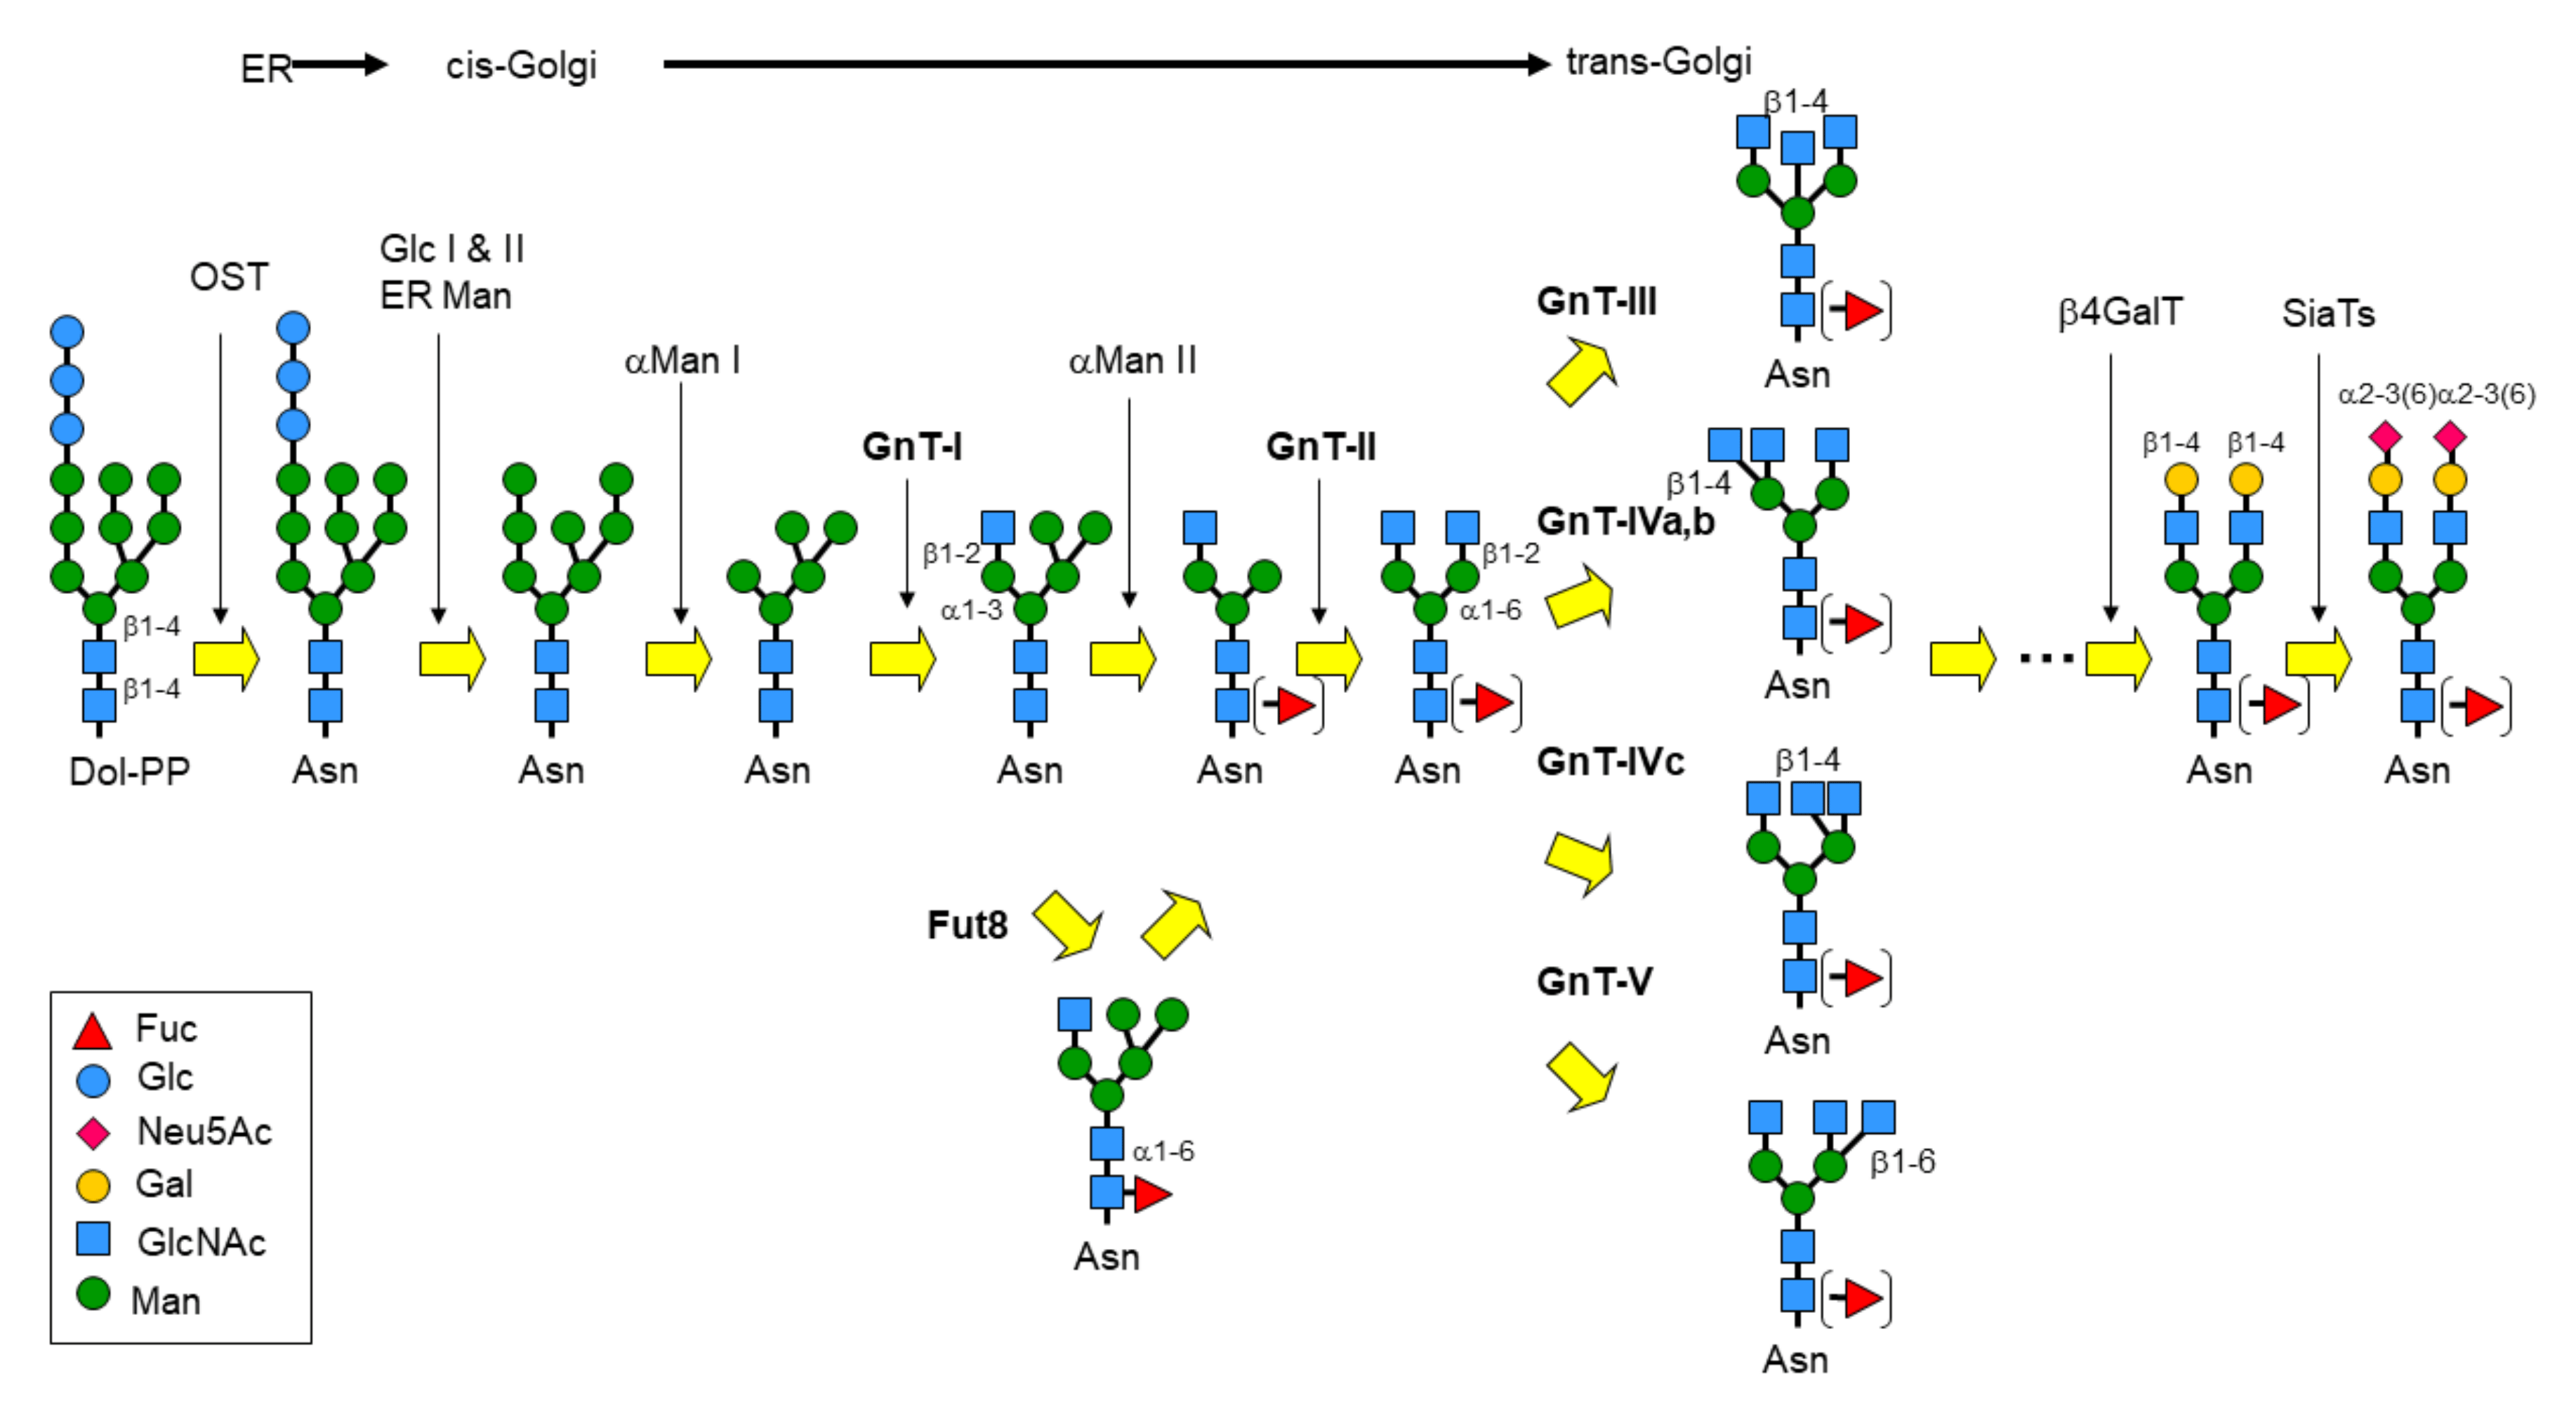

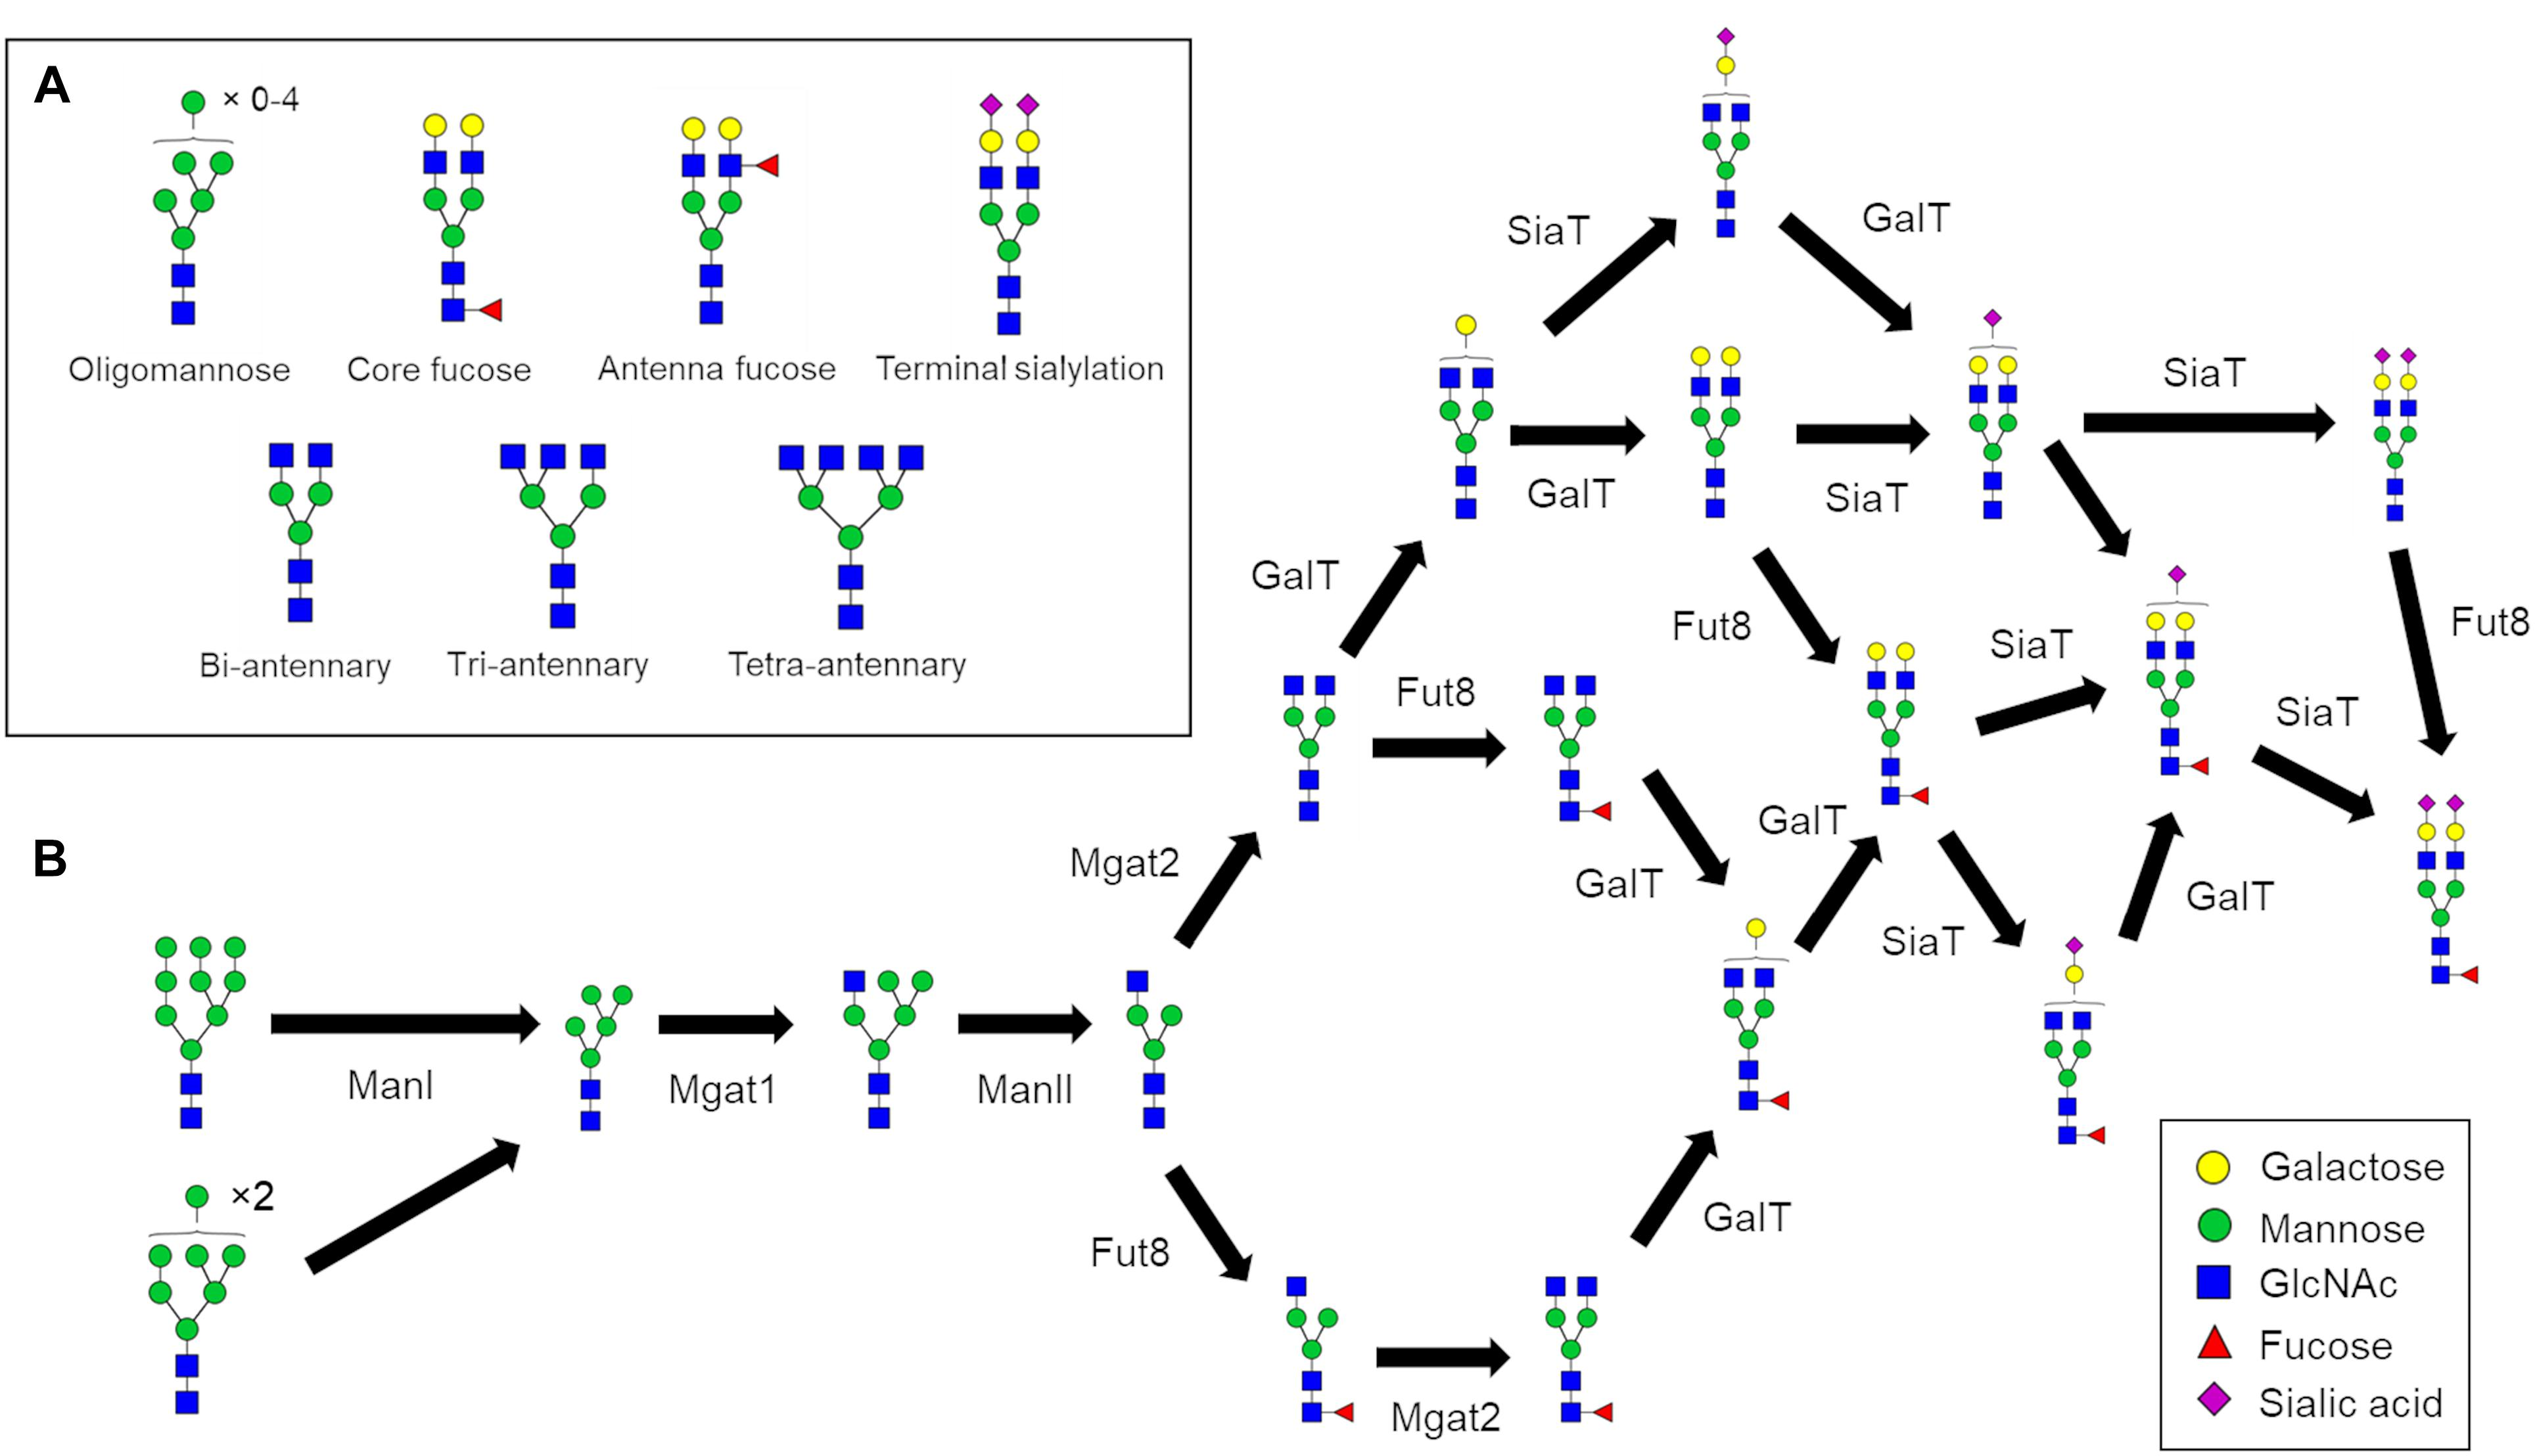

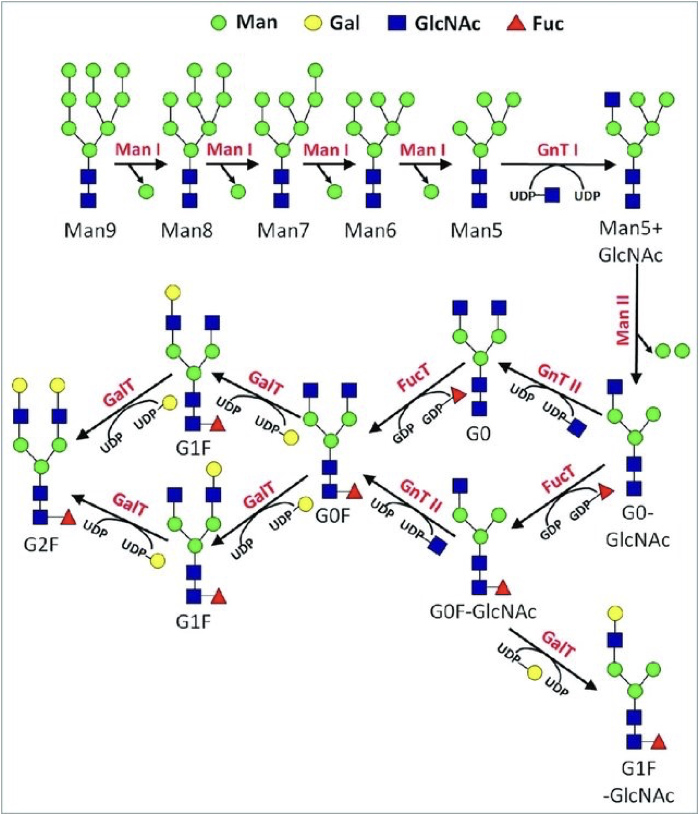

In [ ]:
## Part II
nglycan_path = ['Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-2)Man(a1-3)[Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','Man(a1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc','GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc','GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc','GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc','GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc','Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc','Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                ]



In [ ]:
for g in nglycan_path :
    list_of_res = []
    list_of_mono = []
    dict_res = {}
    valid_list = []
    my_glycans_path = "glycans_pdb/"
    try :
        currlist = []
        resdf = get_sasa_table(my_glycans_path, g, mode = 'beta')
        res = [v for v in resdf['Weighted Score'].to_list()]
        monolist = [v for v in resdf['Monosaccharide'].to_list()]
        list_of_res.append(res)
        dict_res[g] = res
        
        for x in range(0,len(res)):
            currlist.append(monolist[x].replace('(','\n(') + '\n' + str(round(res[x],ndigits= 2)))
            print(monolist[x] + ' : ' + str(res[x]))
        list_of_mono.append(currlist)
        valid_list.append(g)
        data_inverted = [row[::-1] for row in list_of_res]
        annotations_inverted = [row[::-1] for row in list_of_mono]  # Reverses each row (i.e., the columns)

        plt.figure(figsize=(10, 6))  # Adjust size if needed
        sns.heatmap(data_inverted, annot=annotations_inverted, fmt="", cmap="coolwarm", yticklabels=valid_list)
        # Adjust the font size of the column and row labels

        # Rotate column labels if necessary

        # Show the heatmap
        plt.title('Heatmap of Data')
        plt.savefig(str(g) + '_heatmap_SASA.png', dpi=300, bbox_inches='tight')

    except: 
        print("This glycan failed: " + g)
    

In [ ]:
for g in nglycan_path :
    list_of_res = []
    list_of_mono = []
    dict_res = {}
    valid_list = []
    my_glycans_path = "glycans_pdb/"
    try :
        currlist = []
        isvt = inter_structure_variability_table(my_glycans_path, g, link_type = 'beta', mode = 'weighted' )
        res = global_monosaccharide_unstability(isvt, mode='mean')
        val_list = [res[key] for key in res]
        mono_list = [key.replace('(','\n(') + '\n' + str(round(res[key],ndigits= 2)) for key in res]
        list_of_res.append(val_list)
        dict_res[g] = res
        list_of_mono.append(mono_list)
        valid_list.append(g)


        data_inverted = [row[::-1] for row in list_of_res]
        annotations_inverted = [row[::-1] for row in list_of_mono]  # Reverses each row (i.e., the columns)


        plt.figure(figsize=(10, 6))  # Adjust size if needed
        sns.heatmap(data_inverted, annot=annotations_inverted, fmt="", cmap="coolwarm", yticklabels=valid_list)
        # Adjust the font size of the column and row labels

        # Rotate column labels if necessary

        # Show the heatmap
        plt.title('Heatmap of Data')
        plt.savefig(str(g) + '_heatmap_flexibility.png', dpi=300, bbox_inches='tight')

    except: 
        print("This glycan failed: " + g)
    

# 5 Flexibility and accessibility of sialylated glycans

In [ ]:
neu_glycan_list = ['Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)[Man(a1-3)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']

neu_glycan_list = ['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[GlcNAc(b1-2)Man(a1-3)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'GlcNAc(b1-4)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)][GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                'Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-6)]GlcNAc(b1-2)Gal(b1-4)[Fuc(a1-6)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']

In [ ]:
for g in neu_glycan_list :
    list_of_res = []
    list_of_mono = []
    dict_res = {}
    valid_list = []
    my_glycans_path = "glycans_pdb/"
    try :
        currlist = []
        resdf = get_sasa_table(my_glycans_path, g, mode = 'beta')
        res = [v for v in resdf['Weighted Score'].to_list()]
        monolist = [v for v in resdf['Monosaccharide'].to_list()]
        list_of_res.append(res)
        dict_res[g] = res
        
        for x in range(0,len(res)):
            currlist.append(monolist[x].replace('(','\n(') + '\n' + str(round(res[x],ndigits= 2)))
            print(monolist[x] + ' : ' + str(res[x]))
        list_of_mono.append(currlist)
        valid_list.append(g)
        data_inverted = [row[::-1] for row in list_of_res]
        annotations_inverted = [row[::-1] for row in list_of_mono]  # Reverses each row (i.e., the columns)

        plt.figure(figsize=(10, 6))  # Adjust size if needed
        sns.heatmap(data_inverted, annot=annotations_inverted, fmt="", cmap="coolwarm", yticklabels=valid_list)
        # Adjust the font size of the column and row labels

        # Rotate column labels if necessary

        # Show the heatmap
        plt.title('Heatmap of Data')
        plt.savefig(str(g) + '_heatmap_SASA_NEU.png', dpi=300, bbox_inches='tight')

    except: 
        print("This glycan failed: " + g)
    

In [ ]:
for g in neu_glycan_list :
    list_of_res = []
    list_of_mono = []
    dict_res = {}
    valid_list = []
    my_glycans_path = "glycans_pdb/"
    try :
        currlist = []
        isvt = inter_structure_variability_table(my_glycans_path, g, link_type = 'beta', mode = 'weighted' )
        res = global_monosaccharide_unstability(isvt, mode='mean')
        val_list = [res[key] for key in res]
        mono_list = [key.replace('(','\n(') + '\n' + str(round(res[key],ndigits= 2)) for key in res]
        list_of_res.append(val_list)
        dict_res[g] = res
        list_of_mono.append(mono_list)
        valid_list.append(g)


        data_inverted = [row[::-1] for row in list_of_res]
        annotations_inverted = [row[::-1] for row in list_of_mono]  # Reverses each row (i.e., the columns)


        plt.figure(figsize=(10, 6))  # Adjust size if needed
        sns.heatmap(data_inverted, annot=annotations_inverted, fmt="", cmap="coolwarm", yticklabels=valid_list)
        # Adjust the font size of the column and row labels

        # Rotate column labels if necessary

        # Show the heatmap
        plt.title('Heatmap of Data')
        plt.savefig(str(g) + '_heatmap_flexibility_NEU.png', dpi=300, bbox_inches='tight')

    except: 
        print("This glycan failed: " + g)